In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from glob import glob
import koreanize_matplotlib
import datetime as dt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
file_list = glob('mini_data/6*.parquet')
file_list

['mini_data\\6candoit.parquet']

In [5]:
df=pd.read_parquet(file_list[0])
df.head(3)

event_time event_type  product_id          category_id  \
29857089  2019-10-22 11:02:15 UTC       view     5000487  2053013566100866035   
5542128   2019-10-05 10:18:33 UTC       view    10400516  2053013553257906447   
32275151  2019-10-24 06:29:48 UTC       view     8700583  2053013563097744201   

                            category_code   brand    price    user_id  \
29857089        appliances.sewing_machine  janome  1265.80  547734601   
5542128                         kids.toys  woddon    31.30  518668802   
32275151  appliances.personal.hair_cutter   braun    97.79  553901554   

                                  user_session  
29857089  708ae7a4-398a-4ff7-bb8c-5a4fe1e6efc3  
5542128   58bcf566-8410-4672-8104-9c7089625acb  
32275151  c26cb571-4d54-440e-bf77-a1a5805a10e5

In [6]:
df.nunique()

event_time        4529222
event_type              3
product_id         182125
category_id           687
category_code         129
brand                4136
price               71717
user_id           3336230
user_session     10303388
dtype: int64

In [7]:
df = df.sort_index()
df.head()

event_time event_type  product_id          category_id  \
5   2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   
6   2019-10-01 00:00:08 UTC       view    17300353  2053013553853497655   
7   2019-10-01 00:00:08 UTC       view    31500053  2053013558031024687   
8   2019-10-01 00:00:10 UTC       view    28719074  2053013565480109009   
14  2019-10-01 00:00:16 UTC       view    13500240  2053013557099889147   

            category_code     brand   price    user_id  \
5      computers.notebook        hp  360.09  520772685   
6                     NaN     creed  380.96  555447699   
7                     NaN  luminarc   41.16  550978835   
8      apparel.shoes.keds     baden  102.71  520571932   
14  furniture.bedroom.bed       brw   93.18  555446365   

                            user_session  
5   816a59f3-f5ae-4ccd-9b23-82aa8c23d33c  
6   4fe811e9-91de-46da-90c3-bbd87ed3a65d  
7   6280d577-25c8-4147-99a7-abc6048498d6  
8   ac1cd4e5-a3ce-4224-a2d7-ff660a105880  
14  7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4

In [8]:
df.dtypes

event_time       category
event_type       category
product_id          int64
category_id        uint64
category_code    category
brand            category
price             float64
user_id             int64
user_session     category
dtype: object

In [9]:
df["event_time"] = pd.to_datetime(df["event_time"])

### 구매자 데이터

In [10]:
df_p = df[(df['event_type']=='purchase')]
df_p

event_time event_type  product_id  \
672      2019-10-01 00:10:56+00:00   purchase     6200687   
860      2019-10-01 00:14:14+00:00   purchase     1004932   
1107     2019-11-01 00:07:38+00:00   purchase    30000218   
2309     2019-11-01 00:15:23+00:00   purchase     1005105   
2539     2019-10-01 02:22:23+00:00   purchase     1307135   
...                            ...        ...         ...   
67500000 2019-11-30 23:46:55+00:00   purchase     1004766   
67500223 2019-11-30 23:48:06+00:00   purchase     5100816   
67500333 2019-11-30 23:48:41+00:00   purchase     1201369   
67500609 2019-11-30 23:50:31+00:00   purchase    26200211   
67500914 2019-11-30 23:52:27+00:00   purchase     4804718   

                  category_id                      category_code      brand  \
672       2053013552293216471  appliances.environment.air_heater      oasis   
860       2053013555631882655             electronics.smartphone       vivo   
1107      2127425436764865054         construction.tools.welding   magnetta   
2309      2053013555631882655             electronics.smartphone      apple   
2539      2053013558920217191                 computers.notebook         hp   
...                       ...                                ...        ...   
67500000  2053013555631882655             electronics.smartphone    samsung   
67500223  2053013553375346967                                NaN     xiaomi   
67500333  2053013561059312345                 electronics.tablet  prestigio   
67500609  2053013563693335403                                NaN        NaN   
67500914  2053013554658804075        electronics.audio.headphone      apple   

            price    user_id                          user_session  
672         28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0  
860        463.31  555083442  83d12d1a-5452-4fa0-abbb-d9f492f8b562  
1107       254.78  515240495  0253151d-5c84-4809-ba02-38ac405494e1  
2309      1348.61  518840496  ef3daa59-4936-43e5-a530-32902f64b2f4  
2539       320.35  514805015  104dc3e4-d6ff-4f00-9031-c0468e75ed4c  
...           ...        ...                                   ...  
67500000   236.25  562742398  cac58091-0e53-4ac6-ae96-642577efc40f  
67500223    32.15  543234577  4e5830ae-dce9-41ac-b087-3eb38ecbc660  
67500333    96.24  512363650  703feaa9-f999-4934-b878-235c2a5076c8  
67500609   277.74  515162380  2842d0e9-4601-49c9-9473-9647f4fca897  
67500914   329.14  567977430  1b358446-2162-4283-8c8a-75f25bb04848  

[311088 rows x 9 columns]

In [11]:

df["hour"] = df["event_time"].dt.hour
df["dow"] = df["event_time"].dt.dayofweek
df["YMD"] = df["event_time"].dt.date



In [12]:
first_date = df.sort_values(by=["event_time"]).iloc[0]["event_time"].date()
df['week'] = df['event_time'].apply(lambda x: (x.date() - first_date).days // 7 + 1)

In [13]:
df["YM"] = df["event_time"].astype(str).str[:7]

In [14]:
df[["event_time","hour","dow","YM","YMD", 'week']].head()

event_time  hour  dow       YM         YMD  week
5  2019-11-01 00:00:01+00:00     0    4  2019-11  2019-11-01     5
6  2019-10-01 00:00:08+00:00     0    1  2019-10  2019-10-01     1
7  2019-10-01 00:00:08+00:00     0    1  2019-10  2019-10-01     1
8  2019-10-01 00:00:10+00:00     0    1  2019-10  2019-10-01     1
14 2019-10-01 00:00:16+00:00     0    1  2019-10  2019-10-01     1

### 이커머스 요일별 사용자 수
- 금토일로 갈 수록 사용자 수가 늘어난 것을 알 수 있음

In [15]:
day_name =  [w for w in "월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [16]:
dow = df["dow"].value_counts().sort_index()
dow = dow * 5.49
dow.index = day_name
dow

월    12908263.68
화    14561445.42
수    14334944.49
목    14927013.54
금    18099256.32
토    18029769.39
일    16939307.16
Name: dow, dtype: float64

<AxesSubplot:>

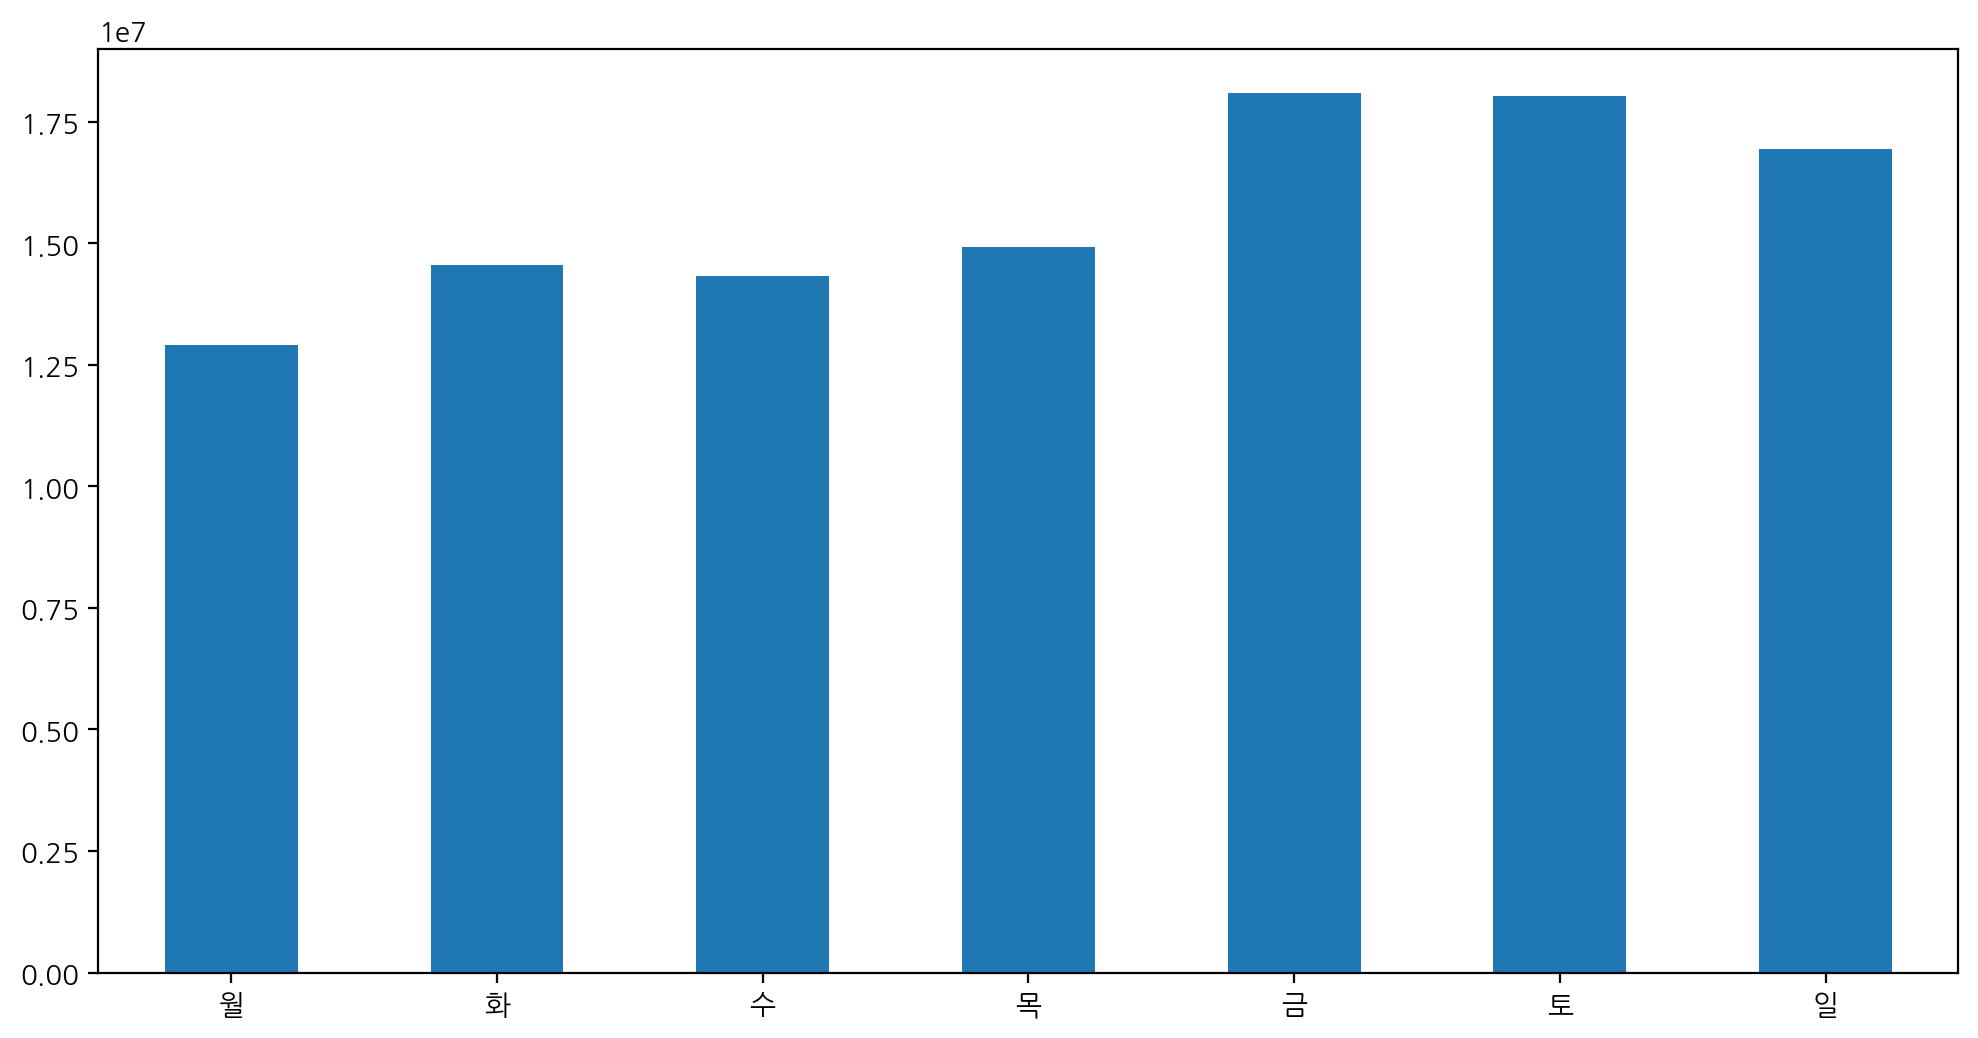

In [17]:
dow.plot.bar(rot=0, figsize=(12,6))

### 시간별 이커머스 사용자수
- 12시 이후부터 사용자의 수가 증가하다가 4시 이후로 감소추세를 보인다
- 이를 통해 사용자 수 파악

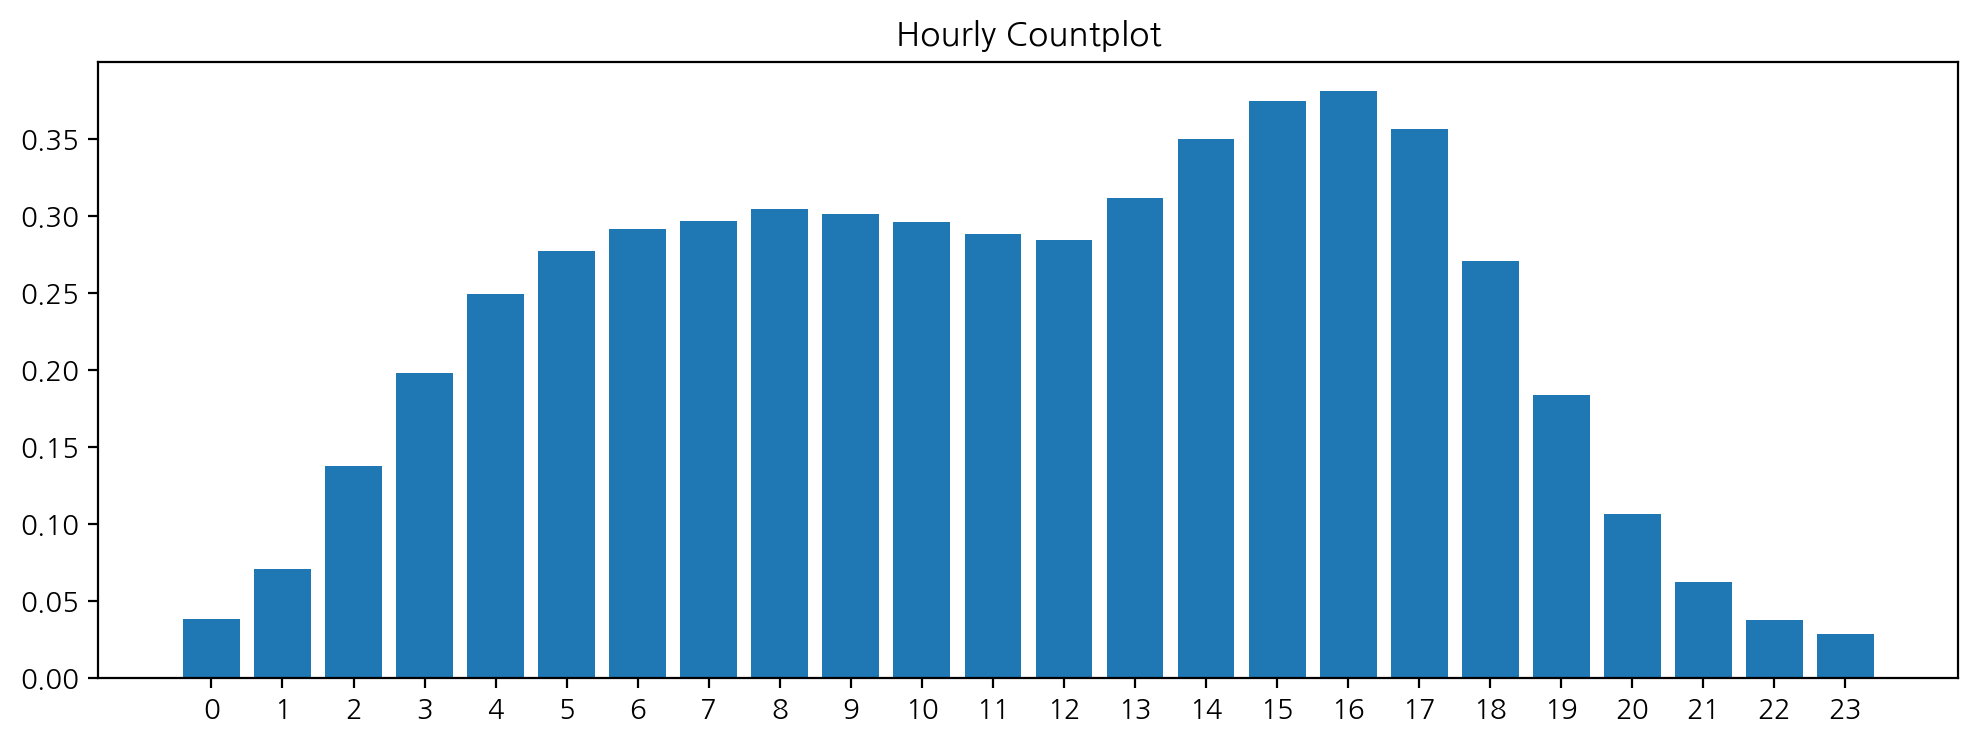

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.bar(x=range(24), height=df["hour"].value_counts(normalize=True).sort_index() * 5.49)
plt.xticks(range(24))
plt.title("Hourly Countplot")
plt.show()


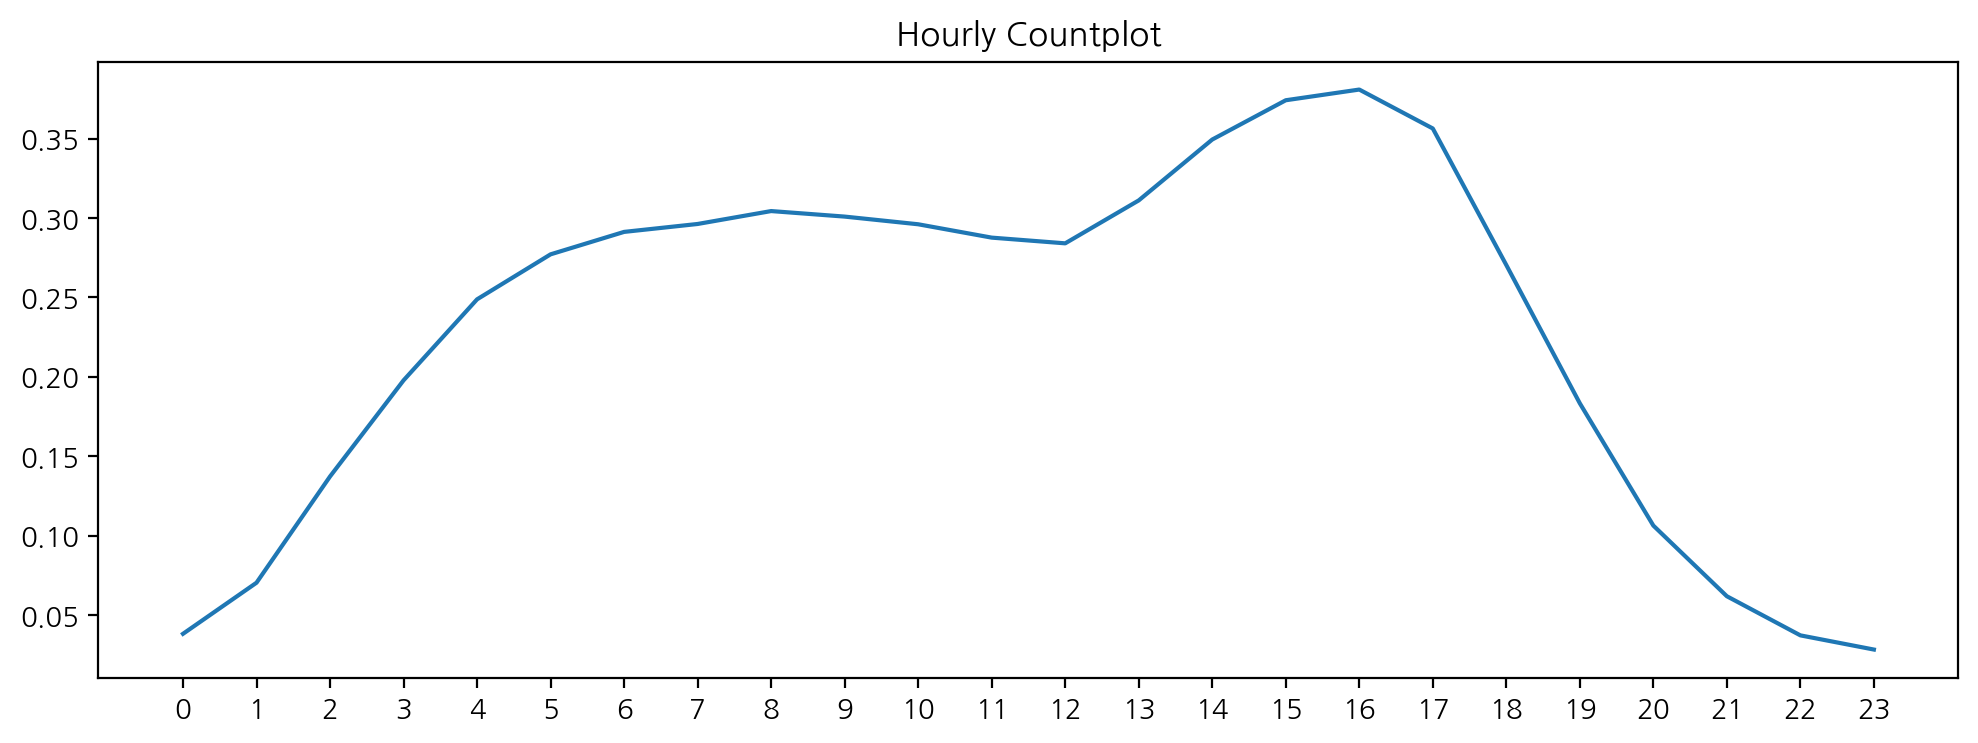

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(range(24), df["hour"].value_counts(normalize=True).sort_index() * 5.49)
plt.xticks(range(24))
plt.title("Hourly Countplot")
plt.show()

### 요일별 시간에 따른 사용자 수
- 금요일 오후3~5시가 사용자 수가 많음을 보여주며 금요일 오후 4시가 사용자 수가 가장 많음을 보여준다.
그다음으로는 일요일, 토요일 순으로 주말과 가까워질수록 사용자 수가 증가함을 보여준다.
- 요일에 따른 마케팅 전략을 통해 사용자 수를 늘릴도록 한다. ex) 주말할인?

In [33]:
hour_week = pd.crosstab(df["hour"], df["dow"])
hour_week = hour_week * 5.49
hour_week.columns = day_name
hour_week

월           화           수           목           금           토  \
hour                                                                          
0      94609.17    92347.29    97249.86   106615.80   159402.15   111447.00   
1     182355.84   159105.69   180862.56   161872.65   279704.52   268856.28   
2     322702.20   338722.02   351420.39   353523.06   530443.80   488214.72   
3     474670.89   513336.96   509175.54   514100.07   707435.91   646936.11   
4     582873.30   632491.92   636186.69   642368.43   822802.77   846684.27   
5     657405.54   723818.07   723949.83   671487.39   894732.75   959152.41   
6     684904.95   780798.78   761095.17   746865.09   912070.17  1006437.78   
7     664388.82   807183.72   775863.27   769791.33   941880.87  1017000.54   
8     684081.45   830658.96   806771.97   800694.54  1009440.81  1006476.21   
9     714836.43   821814.57   794177.91   777312.63  1017708.75   956407.41   
10    683115.21   773661.78   769566.24   745262.01   966563.91   989643.87   
11    646474.95   754177.77   730235.88   718256.70   921655.71   970999.83   
12    645783.21   739903.77   722198.52   706090.86   904021.83   958927.32   
13    713930.58   836796.78   815160.69   812025.90  1024906.14   984494.25   
14    848764.98   956165.85   924362.28   983132.73  1117785.96  1056028.95   
15    953618.49  1057379.49  1039147.20  1014788.07  1186328.61  1097434.53   
16    957955.59  1082726.82  1052839.26  1059339.42  1191599.01  1134327.33   
17    859086.18   951499.35   942737.31  1048804.11  1101425.76  1088469.36   
18    650718.72   722396.16   712091.43   851334.30   901304.28   930840.48   
19    402856.20   453408.12   444975.48   590954.58   657460.44   662500.26   
20    213676.29   236953.89   241263.54   374626.62   407714.85   395960.76   
21    123892.83   139742.46   141488.28   228449.88   226731.51   230964.30   
22     80203.41    84666.78    90628.92   140450.67   137568.42   122739.93   
23     65358.45    71688.42    71496.27   108866.70    78567.39    98825.49   

               일  
hour              
0      101965.77  
1      174516.12  
2      360407.52  
3      590416.56  
4      813189.78  
5      912728.97  
6      933788.61  
7      949555.89  
8      950121.36  
9      936440.28  
10     994151.16  
11    1011977.19  
12    1004917.05  
13    1035166.95  
14    1102930.02  
15    1135293.57  
16    1139949.09  
17    1136512.35  
18     639738.72  
19     454698.27  
20     256635.54  
21     145616.76  
22      87922.35  
23      70667.28

In [34]:
hour_week.style.background_gradient(axis=None, cmap="Blues")

<AxesSubplot:ylabel='hour'>

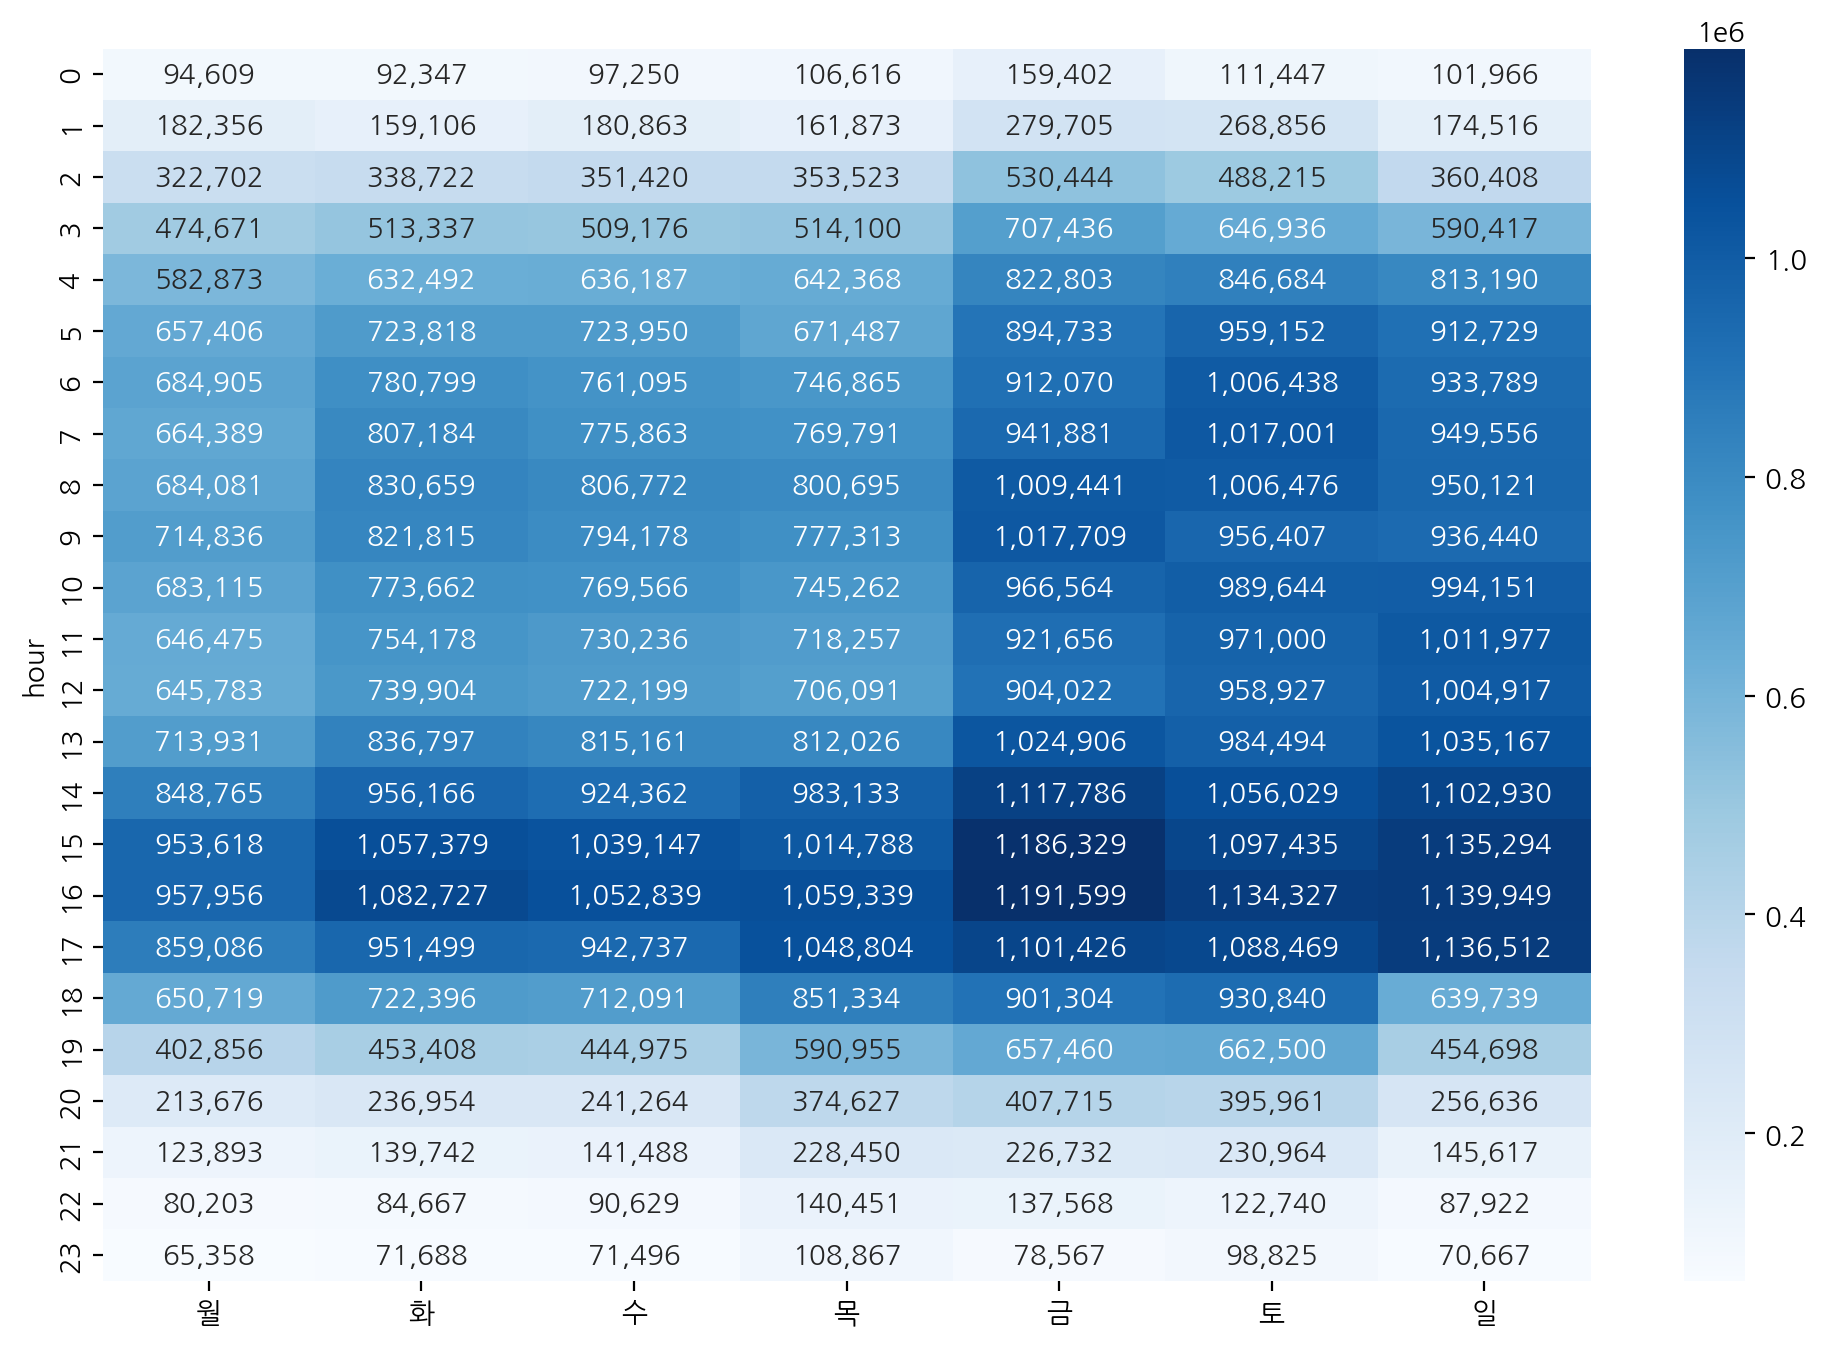

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(hour_week, cmap="Blues", annot=True, fmt=",.0f")

In [36]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    6429834
brand            2808162
price                  0
user_id                0
user_session           1
hour                   0
dow                    0
YMD                    0
week                   0
YM                     0
hour_weighted          0
dtype: int64

### 구매자수

In [37]:
df_p = df[(df['event_type']=='purchase')]
df_p

event_time event_type  product_id  \
672      2019-10-01 00:10:56+00:00   purchase     6200687   
860      2019-10-01 00:14:14+00:00   purchase     1004932   
1107     2019-11-01 00:07:38+00:00   purchase    30000218   
2309     2019-11-01 00:15:23+00:00   purchase     1005105   
2539     2019-10-01 02:22:23+00:00   purchase     1307135   
...                            ...        ...         ...   
67500000 2019-11-30 23:46:55+00:00   purchase     1004766   
67500223 2019-11-30 23:48:06+00:00   purchase     5100816   
67500333 2019-11-30 23:48:41+00:00   purchase     1201369   
67500609 2019-11-30 23:50:31+00:00   purchase    26200211   
67500914 2019-11-30 23:52:27+00:00   purchase     4804718   

                  category_id                      category_code      brand  \
672       2053013552293216471  appliances.environment.air_heater      oasis   
860       2053013555631882655             electronics.smartphone       vivo   
1107      2127425436764865054         construction.tools.welding   magnetta   
2309      2053013555631882655             electronics.smartphone      apple   
2539      2053013558920217191                 computers.notebook         hp   
...                       ...                                ...        ...   
67500000  2053013555631882655             electronics.smartphone    samsung   
67500223  2053013553375346967                                NaN     xiaomi   
67500333  2053013561059312345                 electronics.tablet  prestigio   
67500609  2053013563693335403                                NaN        NaN   
67500914  2053013554658804075        electronics.audio.headphone      apple   

            price    user_id                          user_session  hour  dow  \
672         28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0     0    1   
860        463.31  555083442  83d12d1a-5452-4fa0-abbb-d9f492f8b562     0    1   
1107       254.78  515240495  0253151d-5c84-4809-ba02-38ac405494e1     0    4   
2309      1348.61  518840496  ef3daa59-4936-43e5-a530-32902f64b2f4     0    4   
2539       320.35  514805015  104dc3e4-d6ff-4f00-9031-c0468e75ed4c     2    1   
...           ...        ...                                   ...   ...  ...   
67500000   236.25  562742398  cac58091-0e53-4ac6-ae96-642577efc40f    23    5   
67500223    32.15  543234577  4e5830ae-dce9-41ac-b087-3eb38ecbc660    23    5   
67500333    96.24  512363650  703feaa9-f999-4934-b878-235c2a5076c8    23    5   
67500609   277.74  515162380  2842d0e9-4601-49c9-9473-9647f4fca897    23    5   
67500914   329.14  567977430  1b358446-2162-4283-8c8a-75f25bb04848    23    5   

                 YMD  week       YM  hour_weighted  
672       2019-10-01     1  2019-10           0.00  
860       2019-10-01     1  2019-10           0.00  
1107      2019-11-01     5  2019-11           0.00  
2309      2019-11-01     5  2019-11           0.00  
2539      2019-10-01     1  2019-10          10.98  
...              ...   ...      ...            ...  
67500000  2019-11-30     9  2019-11         126.27  
67500223  2019-11-30     9  2019-11         126.27  
67500333  2019-11-30     9  2019-11         126.27  
67500609  2019-11-30     9  2019-11         126.27  
67500914  2019-11-30     9  2019-11         126.27  

[311088 rows x 15 columns]

In [38]:
purchase_dow = df_p["dow"].value_counts().sort_index()
purchase_dow = purchase_dow * 5.49
purchase_dow.index = day_name
purchase_dow

월    210536.01
화    226072.71
수    233264.61
목    226402.11
금    218260.44
토    257041.80
일    336295.44
Name: dow, dtype: float64

### 요일별 구매자수
- 일요일이 가장 높은 구매자수를 보여준다
- 구매자의 행동패턴 분석과 요일에 맞는 마케팅 전략제공

<AxesSubplot:>

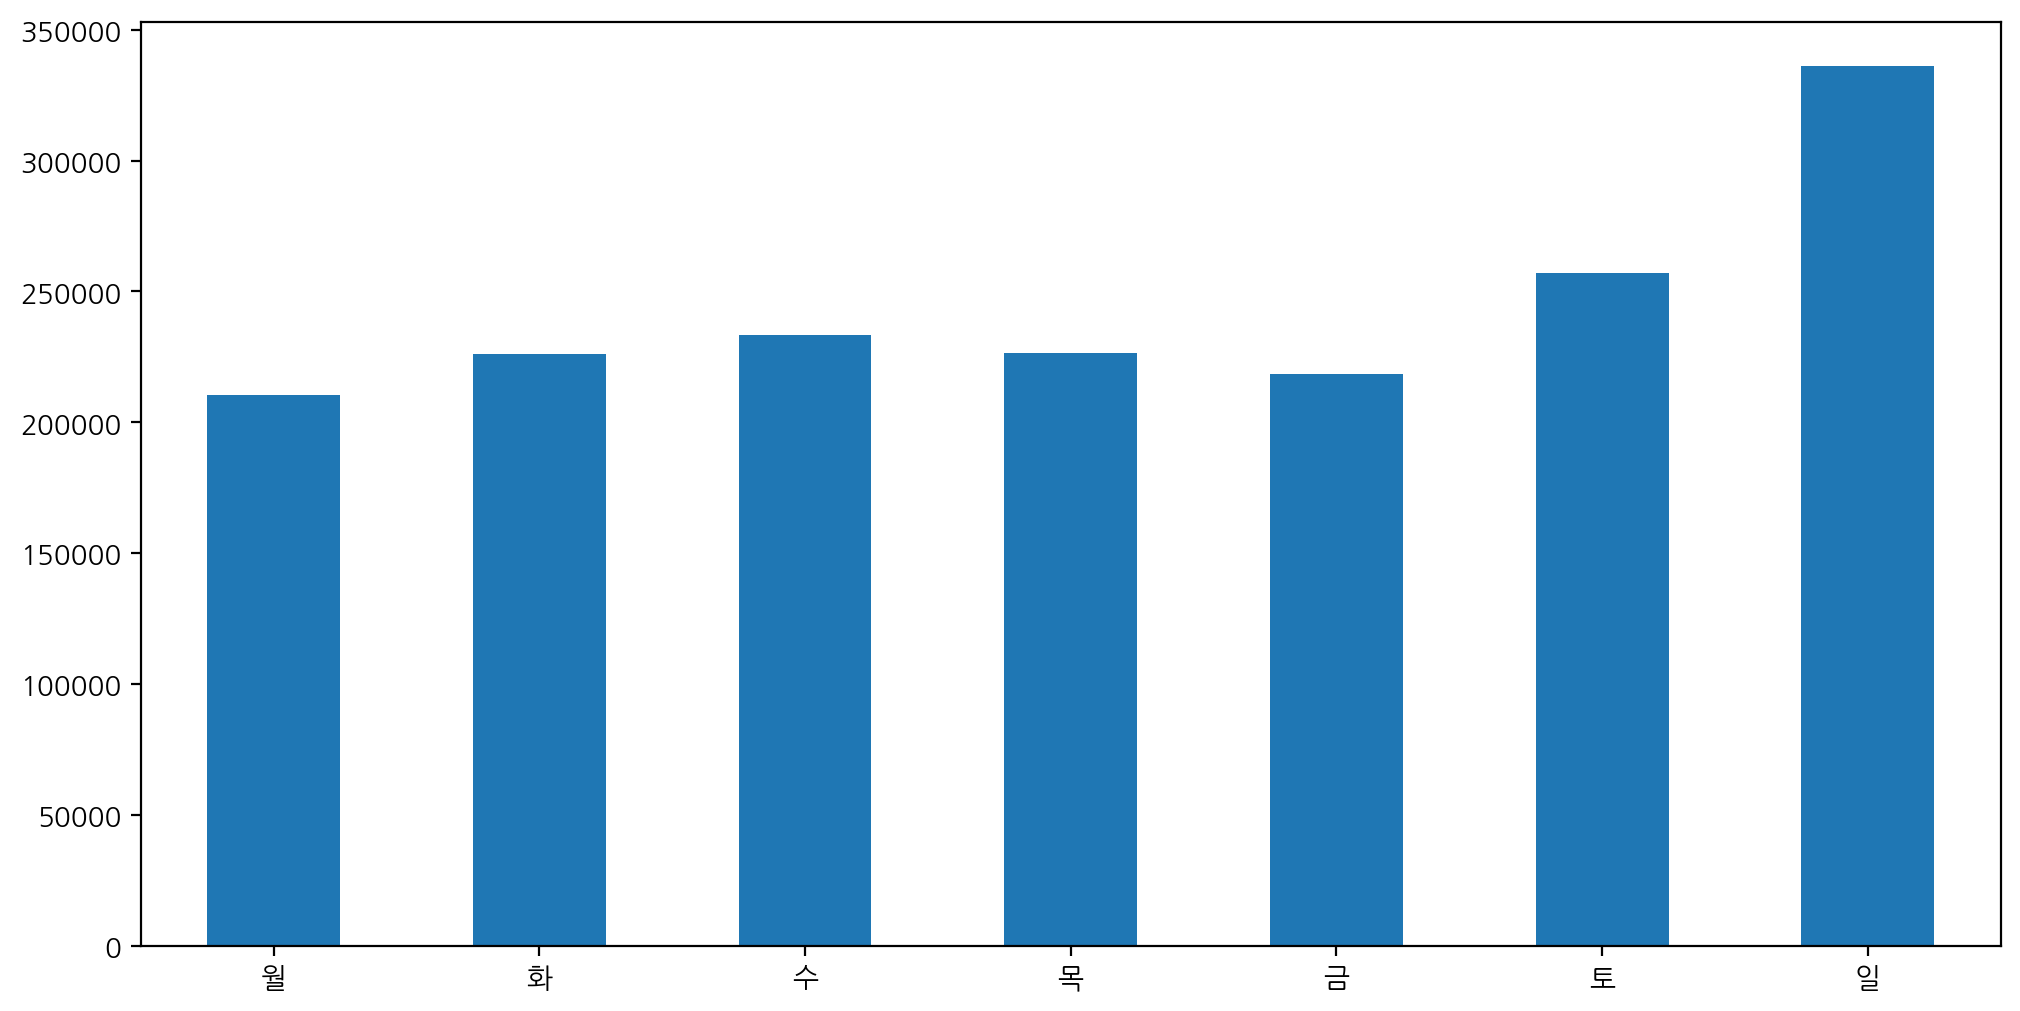

In [39]:
purchase_dow.plot.bar(rot=0, figsize=(12,6))

### 시간대별 구매자수
- 오전 9시가 가장 높은 구매율을 보여주며 전체적으로 아침시간때 구매자 수가 몰려있음을 볼 수 있다.

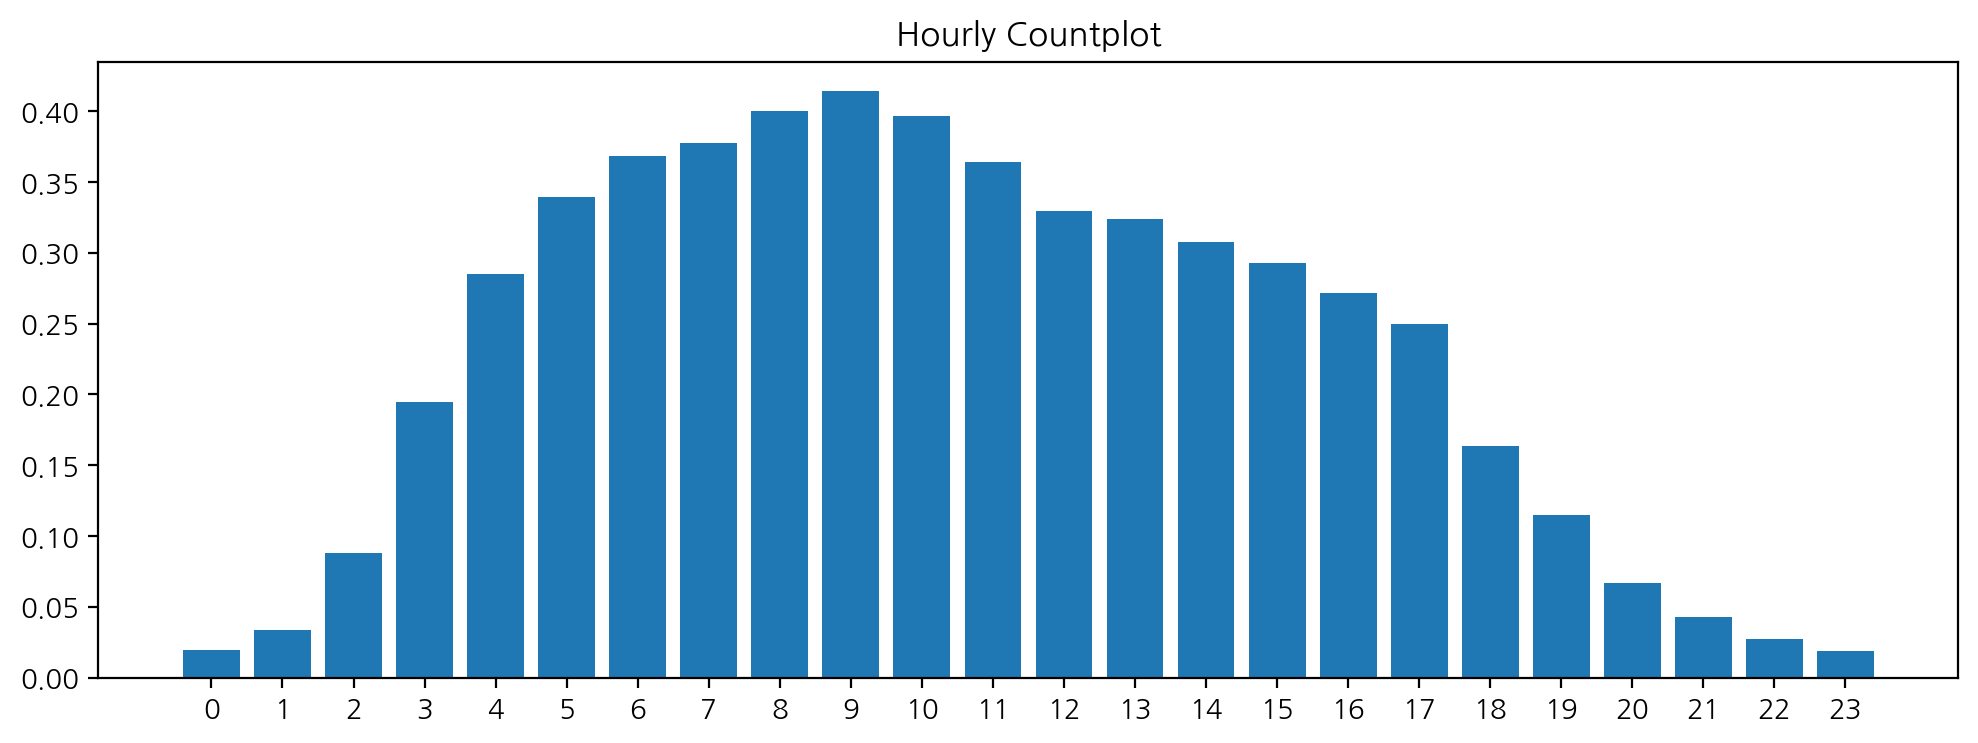

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.bar(x=range(24), height=df_p["hour"].value_counts(normalize=True).sort_index() * 5.49)
plt.xticks(range(24))
plt.title("Hourly Countplot")
plt.show()

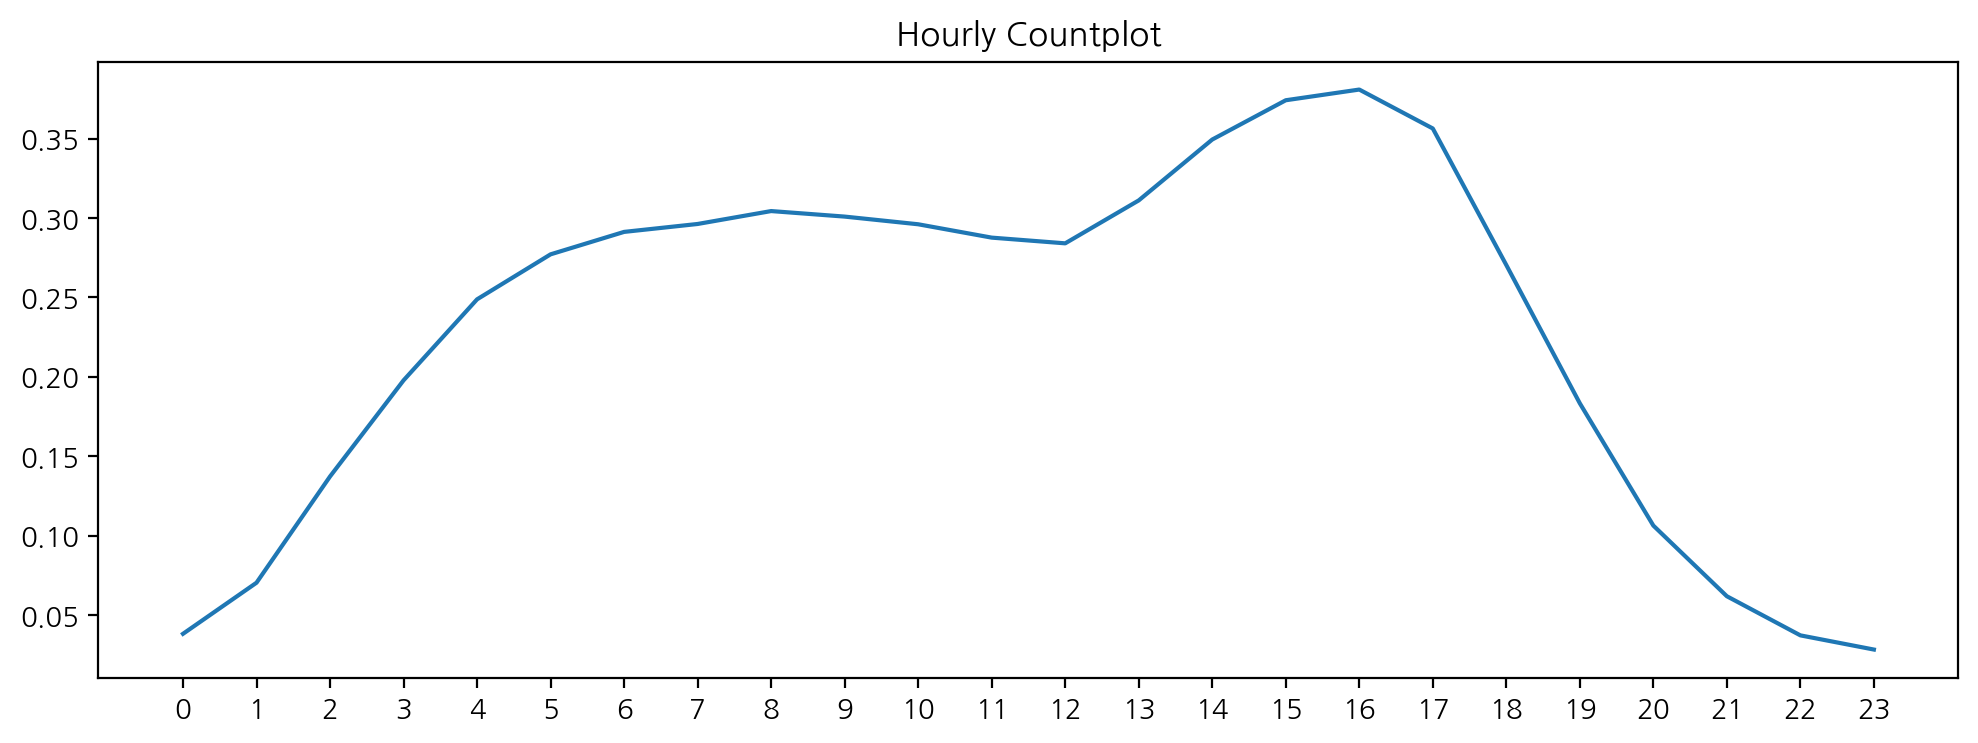

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(range(24), df["hour"].value_counts(normalize=True).sort_index() * 5.49)
plt.xticks(range(24))
plt.title("Hourly Countplot")
plt.show()

### 요일별 시간대 구매자수
- 일요일 오전10시가 가장 높은 구매율을 보여주며 전체적으로 주말 오전시간에 몰려있는 형태를 보여준다
- 요일별 시간대에 맞는 마케팅전략
- 성과분석
- 구매자 선호도 분석

In [42]:
p_hour_dow = pd.crosstab(df_p["hour"], df_p["dow"])
p_hour_dow = p_hour_dow *5.49
p_hour_dow.columns = day_name
p_hour_dow

월         화         수         목         금         토         일
hour                                                                      
0       861.93    850.95    823.50    971.73    955.26    774.09    746.64
1      1608.57   1301.13   1685.43   1471.32   1690.92   1614.06   1098.00
2      4139.46   4166.91   4375.53   4584.15   3996.72   3288.51   2887.74
3      8130.69   9404.37   9074.97   9739.26   8767.53   7570.71   7757.37
4     11913.30  12231.72  12522.69  12643.47  11962.71  10958.04  16420.59
5     13757.94  14795.55  15026.13  14043.42  13774.41  13274.82  20872.98
6     14378.31  16310.79  16222.95  16019.82  14400.27  14586.93  22596.84
7     14284.98  17079.39  16151.58  16579.80  15399.45  15196.32  22739.58
8     15037.11  17320.95  16728.03  16623.72  15597.09  19308.33  23837.58
9     15761.79  16415.10  17864.46  16014.33  15877.08  23689.35  23283.09
10    14894.37  15630.03  16717.05  15081.03  14586.93  21927.06  24540.30
11    13703.04  13110.12  14339.88  13950.09  14268.51  20065.95  23925.42
12    11863.89  12006.63  13197.96  11891.34  12275.64  18945.99  22426.65
13    11243.52  11935.26  12753.27  11869.38  12917.97  18204.84  21745.89
14    11221.56  11117.25  11666.25  12116.43  11671.74  17672.31  20318.49
15    10782.36  11468.61  12215.25  11611.35  11485.08  13296.78  20186.73
16    10557.27  11770.56  11485.08  11001.96  10820.79   8888.31  20060.46
17     8591.85   9585.54  10436.49  10096.11   9289.08   8421.66  21350.61
18     7065.63   7647.57   7664.04   7861.68   7153.47   6664.86   6725.25
19     4891.59   4957.47   5292.36   5116.68   4787.28   5056.29   5676.66
20     2580.30   2926.17   3107.34   3014.01   2783.43   3403.80   2959.11
21     1625.04   1926.99   1872.09   1998.36   1937.97   1866.60   2047.77
22      971.73   1196.82   1290.15   1229.76   1048.59   1383.48   1257.21
23      669.78    916.83    752.13    872.91    812.52    982.71    834.48

In [43]:
p_hour_dow.style.background_gradient(axis=None, cmap="Blues")

<AxesSubplot:ylabel='hour'>

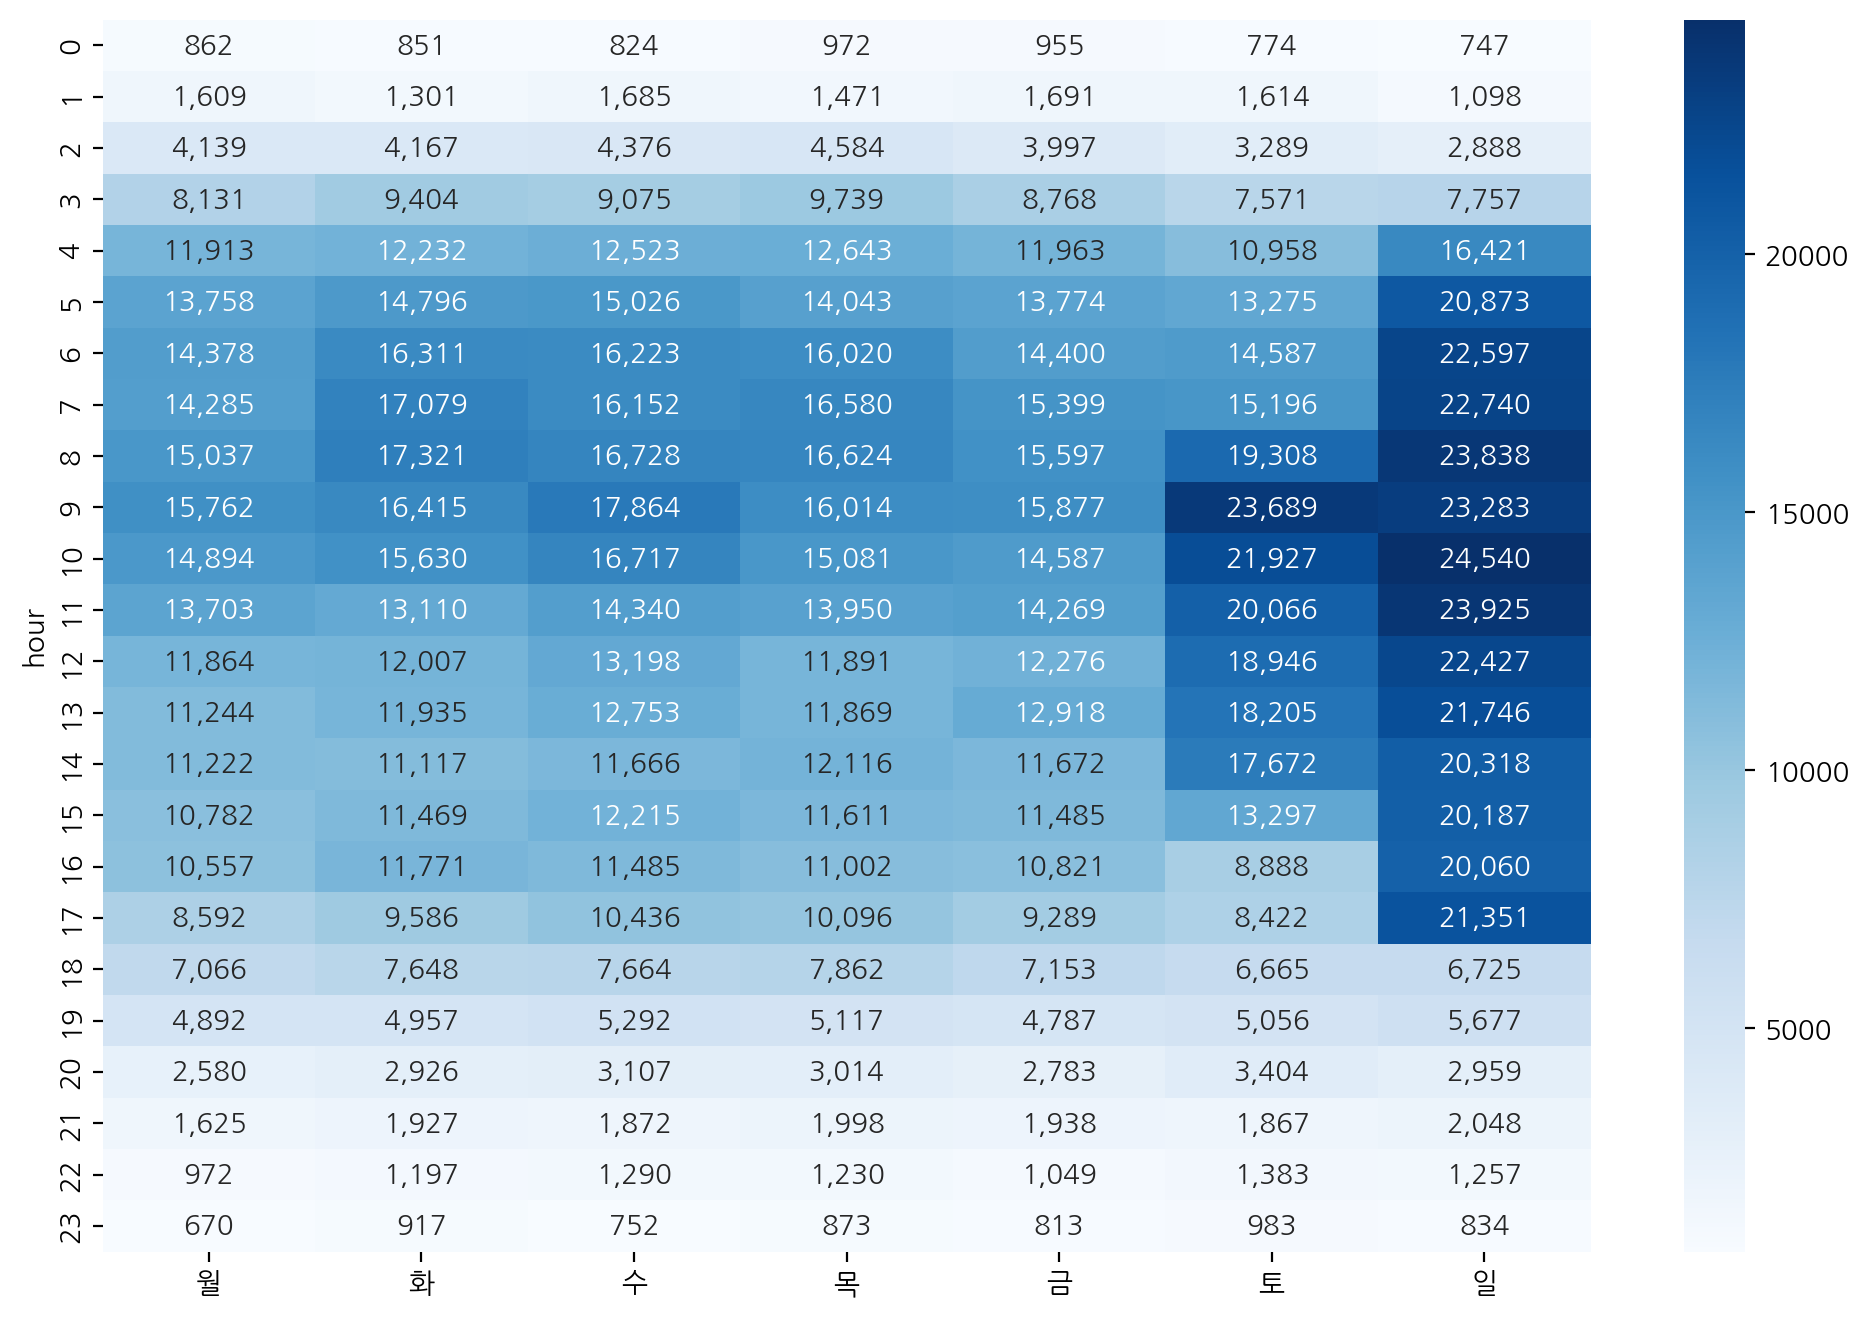

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(p_hour_dow, cmap="Blues", annot=True, fmt=",.0f")

### 월별 ARPU
- 두달밖에 없어서 크게 의미 있는 데이터는 아님
- 매출액 추이 분석
- 이탈율분석
- 성과분석

In [45]:
df_valid = df[df["user_id"].notnull()
             & (df["price"] > 0)].copy()
df.shape, df_valid.shape

((20000000, 15), (19956042, 15))

In [46]:
arpu = df.groupby(["YM"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
arpu["ARPU"] = arpu["price"] / arpu["user_id"]
arpu

price  user_id         ARPU
YM                                         
2019-10  2.903718e+09  1985070  1462.778880
2019-11  2.925356e+09  2145179  1363.688678

<AxesSubplot:xlabel='YM'>

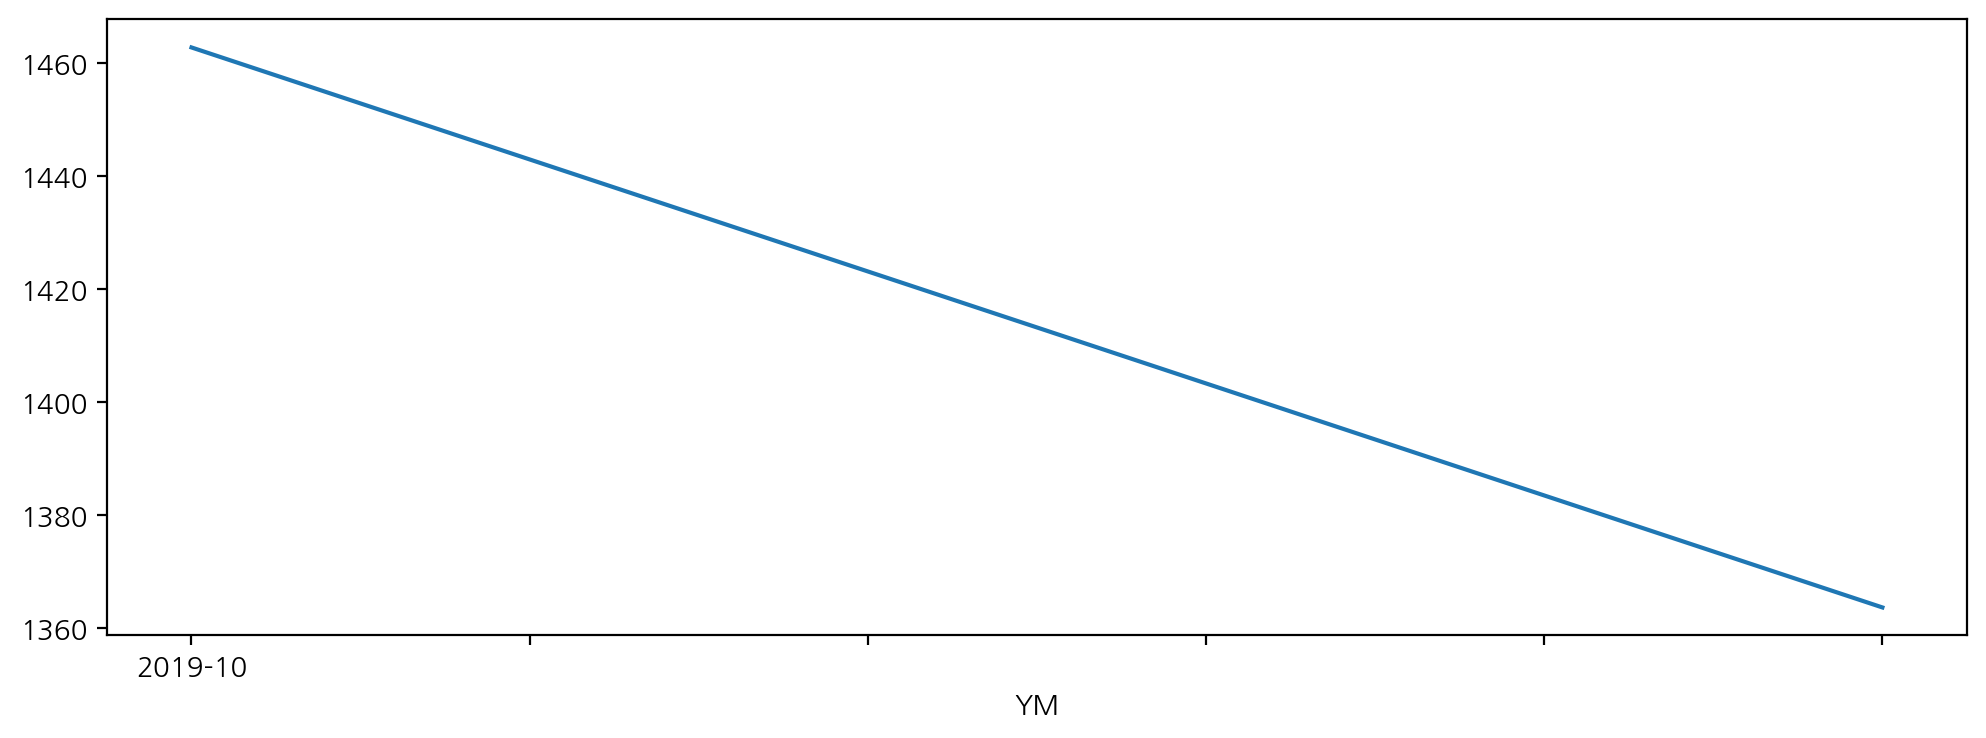

In [47]:
arpu["ARPU"].plot(figsize=(12, 4))

### 일별 ARPU

In [48]:
arpu = df.groupby(["YMD"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
arpu["ARPU"] = arpu["price"] / arpu["user_id"]
arpu


price  user_id        ARPU
YMD                                         
2019-10-01  87385981.56   111961  780.503761
2019-10-02  84178472.71   107854  780.485404
2019-10-03  80032157.51   100602  795.532470
2019-10-04  99539282.20   124700  798.230010
2019-10-05  93370981.42   116132  804.007349
...                 ...      ...         ...
2019-11-26  67511398.05   115265  585.705965
2019-11-27  67576084.04   117220  576.489371
2019-11-28  70076499.18   116379  602.140413
2019-11-29  78493474.34   130418  601.860743
2019-11-30  73119252.80   119327  612.763690

[61 rows x 3 columns]

### 11월 15일이 가장 높은 것을 알 수 있음

<AxesSubplot:xlabel='YMD'>

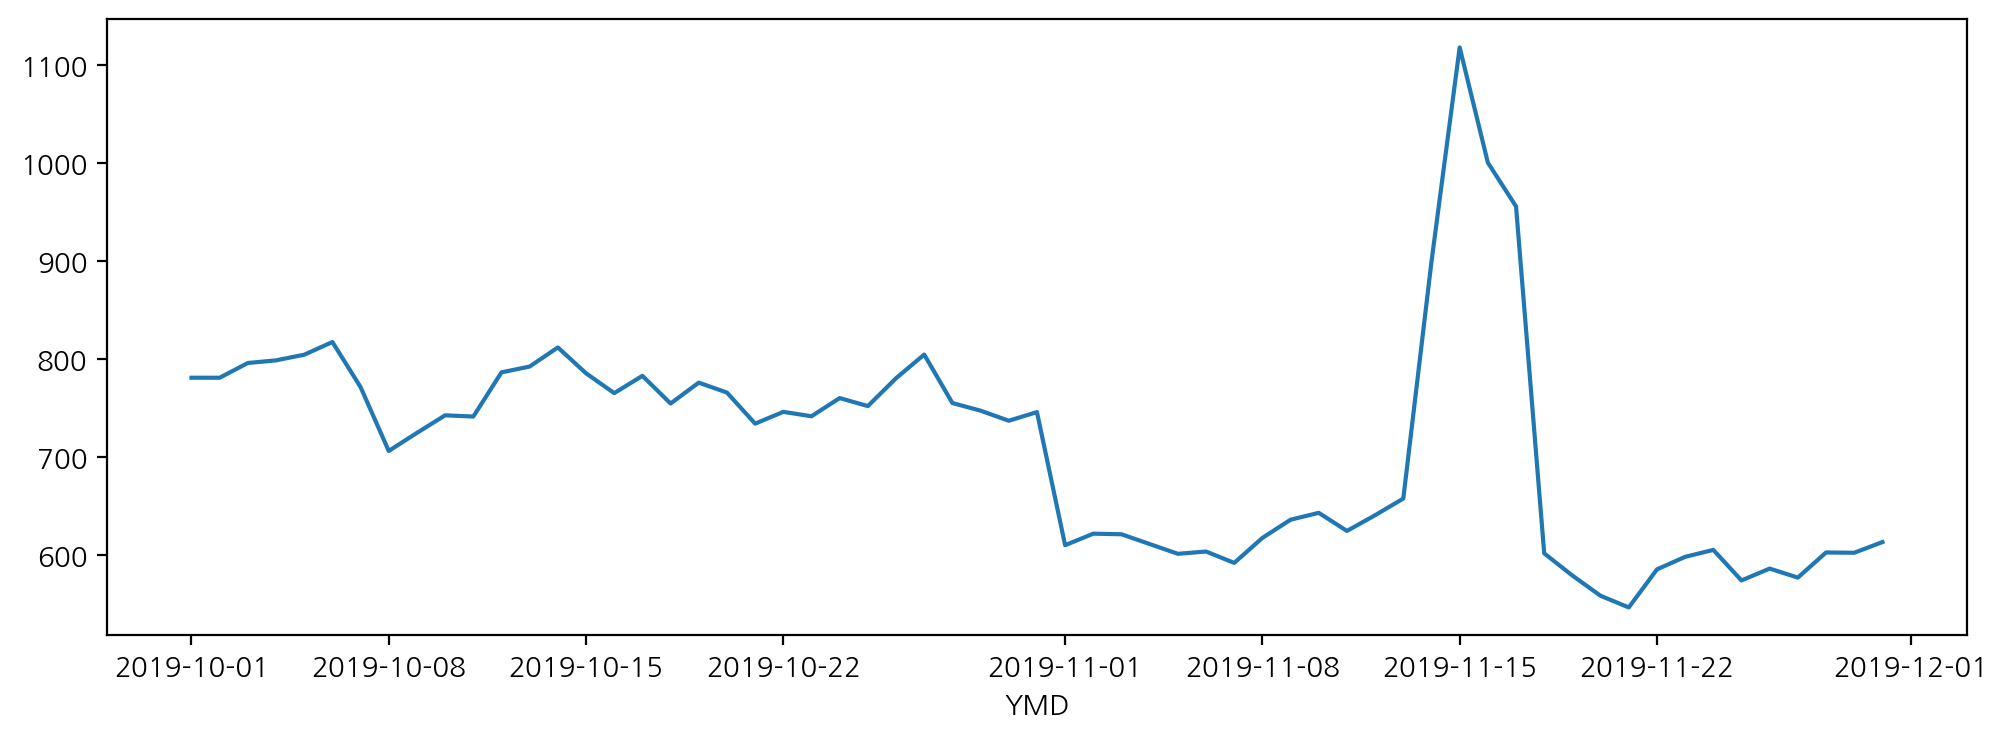

In [49]:
arpu["ARPU"].plot(figsize=(12, 4))

In [50]:
df_valid.groupby("user_id").agg({"user_session":"count", "price":["mean","sum"]})

user_session    price        
                 count     mean     sum
user_id                                
29515875             1  153.670  153.67
31198833             2  165.100  330.20
41798457             1  945.970  945.97
49484535             5   88.082  440.41
50383810             1  199.140  199.14
...                ...      ...     ...
579967711            2   36.600   73.20
579968273            2   62.910  125.82
579969045            1  912.500  912.50
579969053            1   77.200   77.20
579969711            1  208.470  208.47

[3334743 rows x 3 columns]

### 월별 ARPPU
- 구매유저의 매출분석
- 결제 프로세스 개선: ARPPU를 이용하여 결제 프로세스를 개선할 수 있습니다. 결제 프로세스에서의 문제로 인해 결제를 포기하는 사용자가 많다면, ARPPU가 낮아지는 원인이 될 수 있습니다. 따라서, 결제 프로세스에서의 문제를 파악하고, 이를 개선함으로써 ARPPU를 높일 수 있습니다.

In [51]:
df_p_valid = df_p[df_p["user_id"].notnull()
             & (df_p["price"] > 0)].copy()
df_p.shape, df_p_valid.shape

((311088, 15), (311088, 15))

In [52]:
m_arppu = df_p.groupby(["YM"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
m_arppu["ARPPU"] = m_arppu["price"] / m_arppu["user_id"]
m_arppu


price  user_id       ARPPU
YM                                       
2019-10  54359065.72   124063  438.156950
2019-11  40595643.17   107336  378.210881

<AxesSubplot:xlabel='YM'>

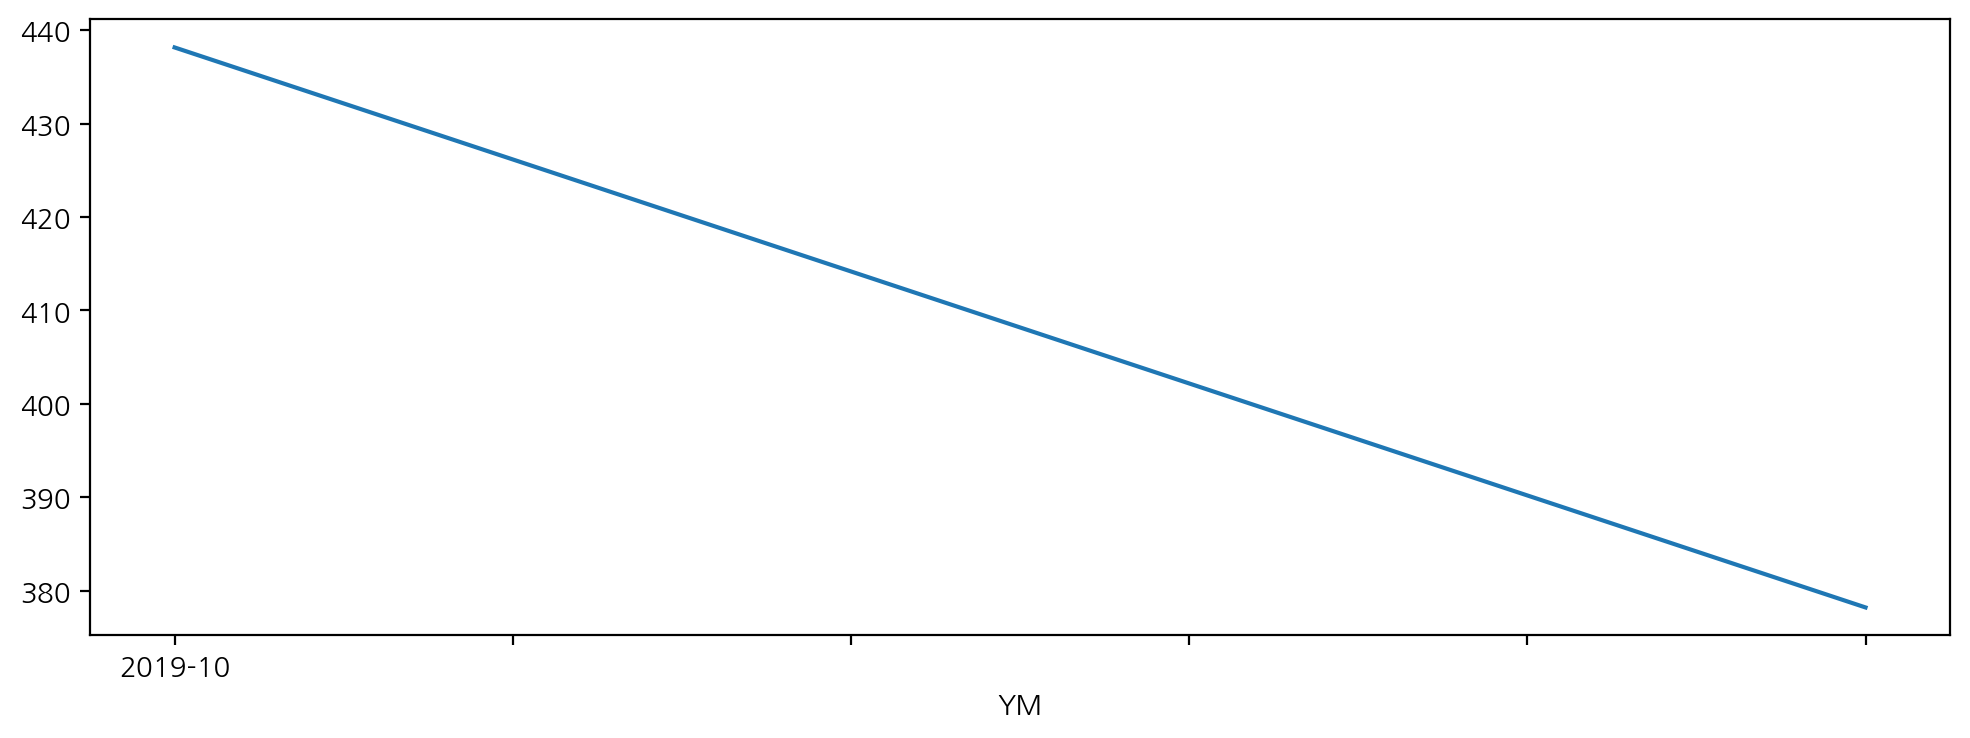

In [53]:
m_arppu["ARPPU"].plot(figsize=(12, 4))

### 일별 ARPPU

In [54]:
arppu = df_p.groupby(["YMD"]).agg({"price": "sum", 
                                             "user_id": "nunique"})
arppu["ARPPU"] = arppu["price"] / arppu["user_id"]
arppu


price  user_id       ARPPU
YMD                                        
2019-10-01  1470969.13     4106  358.248692
2019-10-02  1459641.44     4168  350.201881
2019-10-03  1449575.26     4069  356.248528
2019-10-04  2017164.55     5658  356.515474
2019-10-05  1715921.56     4991  343.803158
2019-10-06  1599475.45     4659  343.308747
2019-10-07  1480233.59     4368  338.881316
2019-10-08  1627575.85     4838  336.415017
2019-10-09  1720177.66     4826  356.439631
2019-10-10  1612434.30     4695  343.436486
2019-10-11  1830290.34     5480  333.994588
2019-10-12  1740686.54     5318  327.319771
2019-10-13  2020303.20     6230  324.286228
2019-10-14  2227141.55     5919  376.269902
2019-10-15  2055696.65     5561  369.663127
2019-10-16  2220978.45     6433  345.247699
2019-10-17  2150504.93     5777  372.252887
2019-10-18  1911658.86     5367  356.187602
2019-10-19  1829403.48     5263  347.597089
2019-10-20  1761733.42     5372  327.947398
2019-10-21  1852183.11     5370  344.913056
2019-10-22  1798446.64     5277  340.808535
2019-10-23  1754790.83     5103  343.874354
2019-10-24  1803361.62     5067  355.903221
2019-10-25  1724194.11     5100  338.077276
2019-10-26  1653934.96     4868  339.756565
2019-10-27  1706097.09     4949  344.735722
2019-10-28  1553927.39     4426  351.090689
2019-10-29  1503754.50     4198  358.207361
2019-10-30  1593104.30     4415  360.839026
2019-10-31  1513704.96     4191  361.179900
2019-11-01  1042710.80     3038  343.222778
2019-11-02   922952.50     2989  308.783038
2019-11-03  1029196.89     3121  329.765104
2019-11-04  1189963.09     3736  318.512604
2019-11-05  1048521.99     3381  310.121854
2019-11-06  1058377.33     3430  308.564819
2019-11-07  1057391.12     3428  308.457153
2019-11-08  1146009.79     3586  319.578859
2019-11-09   957449.81     3119  306.973328
2019-11-10   985282.44     3240  304.099519
2019-11-11  1081705.55     3442  314.266575
2019-11-12  1023100.77     3095  330.565677
2019-11-13   996129.93     3045  327.136266
2019-11-14  1031388.00     3012  342.426295
2019-11-16  3529147.72     9305  379.274339
2019-11-17  8530936.21    24177  352.853382
2019-11-18  1234261.51     3865  319.343211
2019-11-19  1115386.32     3410  327.092762
2019-11-20  1038414.44     3529  294.251754
2019-11-21  1055128.27     3518  299.922760
2019-11-22  1008824.28     3265  308.981403
2019-11-23   904773.52     2910  310.918735
2019-11-24   958705.04     3175  301.954343
2019-11-25  1042776.42     3375  308.970791
2019-11-26   988001.71     3250  304.000526
2019-11-27  1001071.16     3296  303.723046
2019-11-28  1033547.25     3239  319.094551
2019-11-29  1392240.47     4421  314.915284
2019-11-30  1192248.84     3838  310.643262

### 10월14일과 11월 15일이 높은것을볼수있음

<AxesSubplot:xlabel='YMD'>

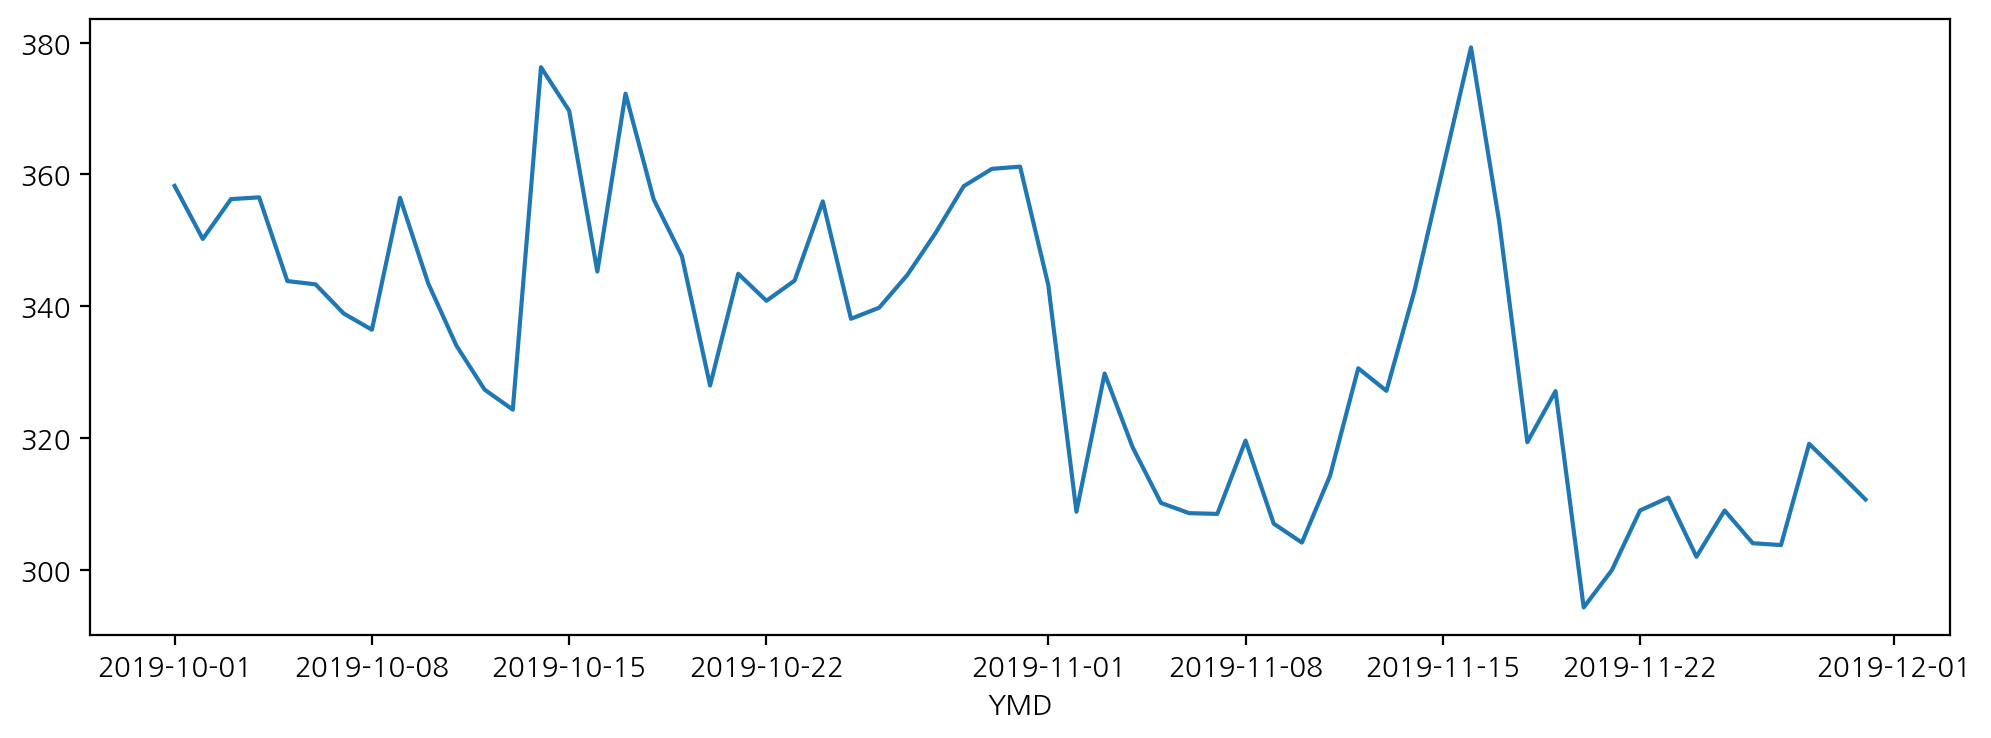

In [55]:
arppu["ARPPU"].plot(figsize=(12, 4))

### 사용자수
- 11월이 더 높은 것을 알 수 있음

### MAU

In [56]:
df_valid.groupby("YM").agg({"user_id":"nunique"})

user_id
YM              
2019-10  1984244
2019-11  2143862

### DAU

In [57]:
df_valid.groupby("YMD").agg({"user_id":"nunique"})

user_id
YMD                
2019-10-01   111872
2019-10-02   107776
2019-10-03   100560
2019-10-04   124655
2019-10-05   116094
...             ...
2019-11-26   115221
2019-11-27   117100
2019-11-28   116295
2019-11-29   130343
2019-11-30   119313

[61 rows x 1 columns]

In [58]:
df.head()

event_time event_type  product_id          category_id  \
5  2019-11-01 00:00:01+00:00       view     1306894  2053013558920217191   
6  2019-10-01 00:00:08+00:00       view    17300353  2053013553853497655   
7  2019-10-01 00:00:08+00:00       view    31500053  2053013558031024687   
8  2019-10-01 00:00:10+00:00       view    28719074  2053013565480109009   
14 2019-10-01 00:00:16+00:00       view    13500240  2053013557099889147   

            category_code     brand   price    user_id  \
5      computers.notebook        hp  360.09  520772685   
6                     NaN     creed  380.96  555447699   
7                     NaN  luminarc   41.16  550978835   
8      apparel.shoes.keds     baden  102.71  520571932   
14  furniture.bedroom.bed       brw   93.18  555446365   

                            user_session  hour  dow         YMD  week  \
5   816a59f3-f5ae-4ccd-9b23-82aa8c23d33c     0    4  2019-11-01     5   
6   4fe811e9-91de-46da-90c3-bbd87ed3a65d     0    1  2019-10-01     1   
7   6280d577-25c8-4147-99a7-abc6048498d6     0    1  2019-10-01     1   
8   ac1cd4e5-a3ce-4224-a2d7-ff660a105880     0    1  2019-10-01     1   
14  7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4     0    1  2019-10-01     1   

         YM  hour_weighted  
5   2019-11            0.0  
6   2019-10            0.0  
7   2019-10            0.0  
8   2019-10            0.0  
14  2019-10            0.0

### 월단위 데이터 전처리

In [59]:
df_p_valid["YMD"] = pd.to_datetime(df_p_valid["YM"])

In [60]:
df_p_valid["YMDMin"] = df_p_valid.groupby("user_id")["YMD"].transform("min")
df_p_valid[["user_id", "event_time", "YMD", "YMDMin"]]

user_id                event_time        YMD     YMDMin
672       548691404 2019-10-01 00:10:56+00:00 2019-10-01 2019-10-01
860       555083442 2019-10-01 00:14:14+00:00 2019-10-01 2019-10-01
1107      515240495 2019-11-01 00:07:38+00:00 2019-11-01 2019-11-01
2309      518840496 2019-11-01 00:15:23+00:00 2019-11-01 2019-10-01
2539      514805015 2019-10-01 02:22:23+00:00 2019-10-01 2019-10-01
...             ...                       ...        ...        ...
67500000  562742398 2019-11-30 23:46:55+00:00 2019-11-01 2019-11-01
67500223  543234577 2019-11-30 23:48:06+00:00 2019-11-01 2019-11-01
67500333  512363650 2019-11-30 23:48:41+00:00 2019-11-01 2019-10-01
67500609  515162380 2019-11-30 23:50:31+00:00 2019-11-01 2019-11-01
67500914  567977430 2019-11-30 23:52:27+00:00 2019-11-01 2019-11-01

[311088 rows x 4 columns]

### 재방문율
- 고객들의 충성도나 만족도를 파악할 수 있음
- 재방문율이 높은 고객들에게 멤버쉽 혜택 제공
- 재방문율이 낮은 고객들에게는 프로모션 제공하여 재방문 유도

In [61]:
df_p['YMD'] = pd.to_datetime(df_p['YMD'])

C:\Users\gusdn\AppData\Local\Temp\ipykernel_12752\2740717663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['YMD'] = pd.to_datetime(df_p['YMD'])


In [62]:
df_re = df_p[['user_id', 'YMD']].copy()

In [63]:
df_re['first_visit'] = df_re.groupby('user_id')['YMD'].transform('min')
df_re['return_visit'] = df_re['YMD'] > df_re['first_visit']

In [64]:
df_re['visit_count'] = df_re.groupby('user_id')['user_id'].transform('count')
df_re['return_count'] = df_re.groupby('user_id')['return_visit'].transform('sum')

In [65]:
df_re['return_rate'] = df_re['return_count'] / df_re['visit_count']

In [66]:
df_re = df_re.drop_duplicates('user_id')[['user_id', 'return_rate']]

In [67]:
df_re

user_id  return_rate
672       548691404     0.000000
860       555083442     0.500000
1107      515240495     0.000000
2309      518840496     0.909091
2539      514805015     0.000000
...             ...          ...
67498225  515064042     0.000000
67498842  579962208     0.000000
67499872  573127657     0.000000
67500223  543234577     0.000000
67500609  515162380     0.000000

[217637 rows x 2 columns]

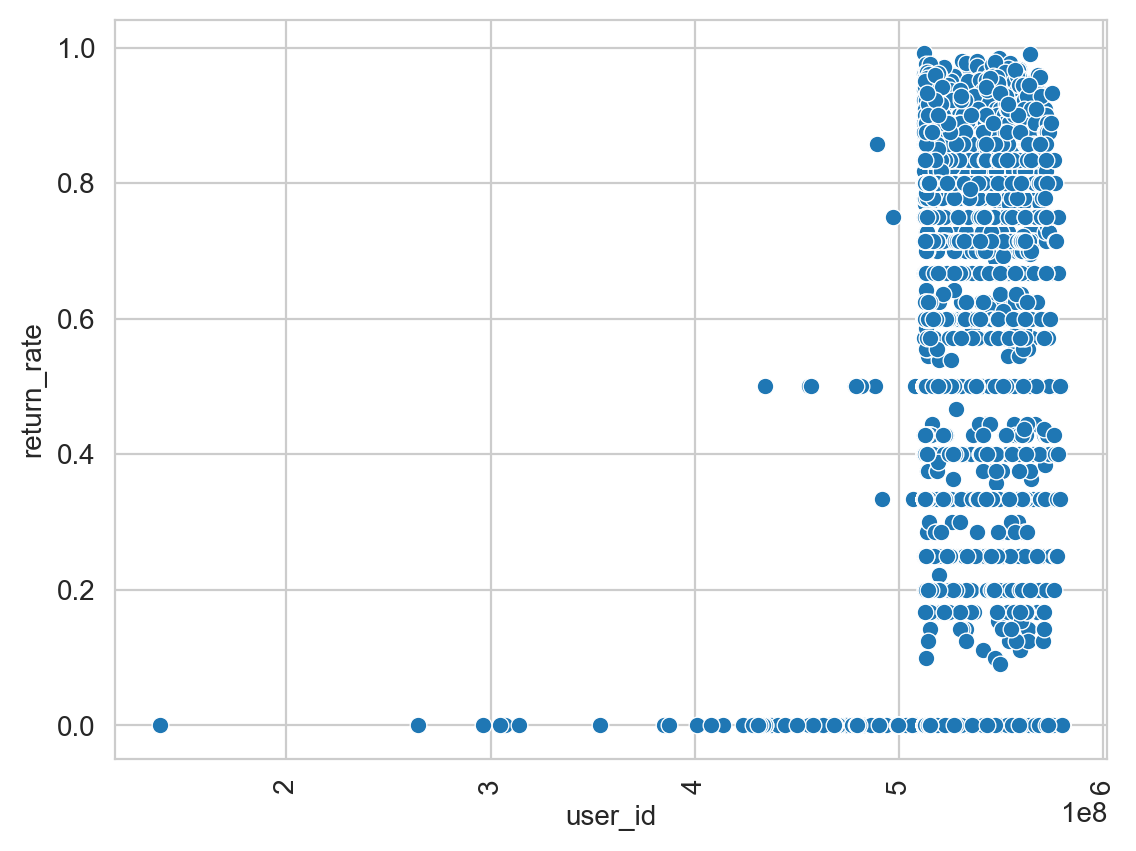

In [68]:
sns.set_style('whitegrid')
sns.scatterplot(x='user_id', y='return_rate', data=df_re)
plt.xticks(rotation=90)
plt.show()

### 재방문율이 높은 상위 10명에 대한 데이터

In [69]:
top_10_users = df_re.groupby('user_id')['return_rate'].mean().nlargest(10).index.tolist()
df_top_10 = df_re[df_re['user_id'].isin(top_10_users)]

In [70]:
df_top_10

user_id  return_rate
28445    530834332     0.980000
73659    513117637     0.982456
390158   564068124     0.990476
445625   512386086     0.991379
473732   538473314     0.979592
526019   549030056     0.984127
834426   533074223     0.977273
1740177  538340540     0.979592
1742698  554551310     0.977273
6201811  546967331     0.978723

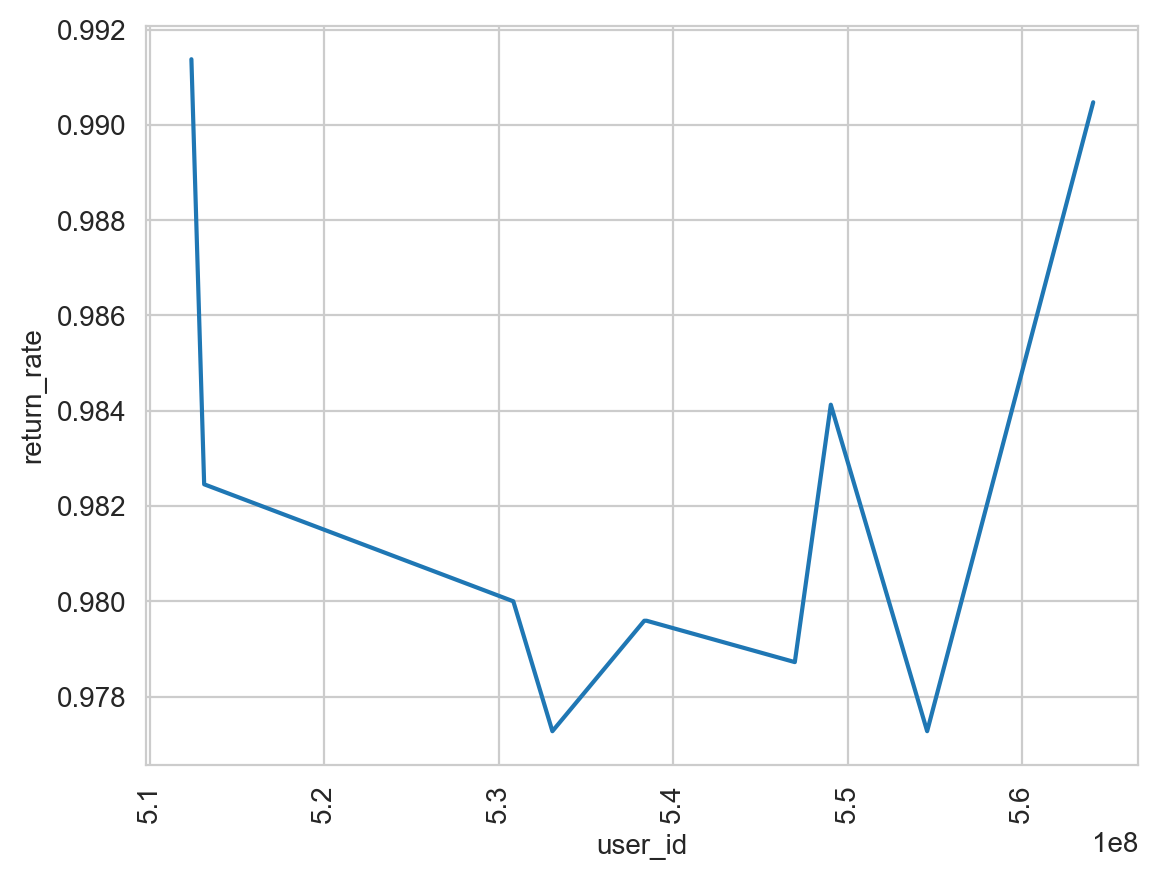

In [71]:
sns.set_style('whitegrid')
sns.lineplot(x='user_id', y='return_rate', data=df_top_10)
plt.xticks(rotation=90)
plt.show()

### 재방문율이 낮은 상위 10명에 대한 데이터
- 재방문율이 낮은 사람은 아예 기간내에 재방문이 없던 고객임

In [72]:
bottom_10_users = df_re.groupby('user_id')['return_rate'].mean().nsmallest(10).index.tolist()
df_bottom_10 = df_re[df_re['user_id'].isin(bottom_10_users)]

In [73]:
df_bottom_10

user_id  return_rate
7244625   264649825          0.0
11801182  307138432          0.0
17595829  138340325          0.0
19479219  314102803          0.0
22160001  304707635          0.0
24048267  384989212          0.0
27965916  401021311          0.0
35608592  387300134          0.0
49864089  353600697          0.0
66305227  296197073          0.0

### 주별 코호트 빈도수
- 고객 충성도 분석: 고객이 자주 방문하고 구매하는 것이 중요한 온라인 비즈니스에서, 주간 코호트 빈도수는 고객 충성도 분석에 중요한 역할을 합니다. 특정 기간에 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 고객의 충성도를 파악할 수 있습니다. 이를 통해 고객 그룹 중 어떤 그룹이 가장 충성도가 높은지, 어떤 그룹이 유지에 어려움이 있는지 등을 파악할 수 있습니다.

- 마케팅 효과 분석: 주간 코호트 빈도수는 마케팅 효과 분석에도 활용될 수 있습니다. 특정 기간에 실행한 마케팅 캠페인에 대해 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 해당 캠페인의 효과를 분석할 수 있습니다.

- 제품 개발 분석: 주간 코호트 빈도수는 제품 개발 분석에도 유용합니다. 새로운 제품이나 기능을 추가한 후, 해당 기간에 새로 유입된 고객을 기준으로, 그룹별로 몇 번 방문하는지 측정하여 새로운 기능이나 제품이 사용자에게 만족스러운지 파악할 수 있습니다.

- 수익성 분석: 주간 코호트 빈도수는 수익성 분석에도 활용될 수 있습니다. 고객 그룹별로 몇 번 방문하는지 측정하여, 해당 고객 그룹이 전체 매출에서 어느 정도의 비중을 차지하는지 파악할 수 있습니다. 이를 통해, 수익성이 높은 고객 그룹을 파악하고 해당 그룹에 집중적인 마케팅 또는 서비스 개발을 수행할 수 있습니다.

In [74]:
df_p['cohort_week'] = df_p.groupby('user_id')['week'].transform('min')
df_p['cohort_index'] = (df_p['week'] - df_p['cohort_week']) // 1

C:\Users\gusdn\AppData\Local\Temp\ipykernel_12752\3223358838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['cohort_week'] = df_p.groupby('user_id')['week'].transform('min')
C:\Users\gusdn\AppData\Local\Temp\ipykernel_12752\3223358838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['cohort_index'] = (df_p['week'] - df_p['cohort_week']) // 1


In [75]:
cohorts = df_p.groupby(['cohort_week', 'cohort_index']) \
            .agg(n_customers=('user_id', 'nunique'),
                 n_orders=('event_type', 'count')) \
            .reset_index(drop=False)

In [76]:
initial_users = cohorts[cohorts['cohort_index'] == 0][['cohort_week', 'n_customers']]
initial_users = initial_users.rename(columns={'n_customers': 'n_users'})
cohorts = pd.merge(cohorts, initial_users, on='cohort_week')
cohorts['purchase_rate'] = cohorts['n_customers'] / cohorts['n_users']

In [77]:
retention_matrix = cohorts.pivot(index='cohort_week',
                                 columns='cohort_index',
                                 values='purchase_rate')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\si

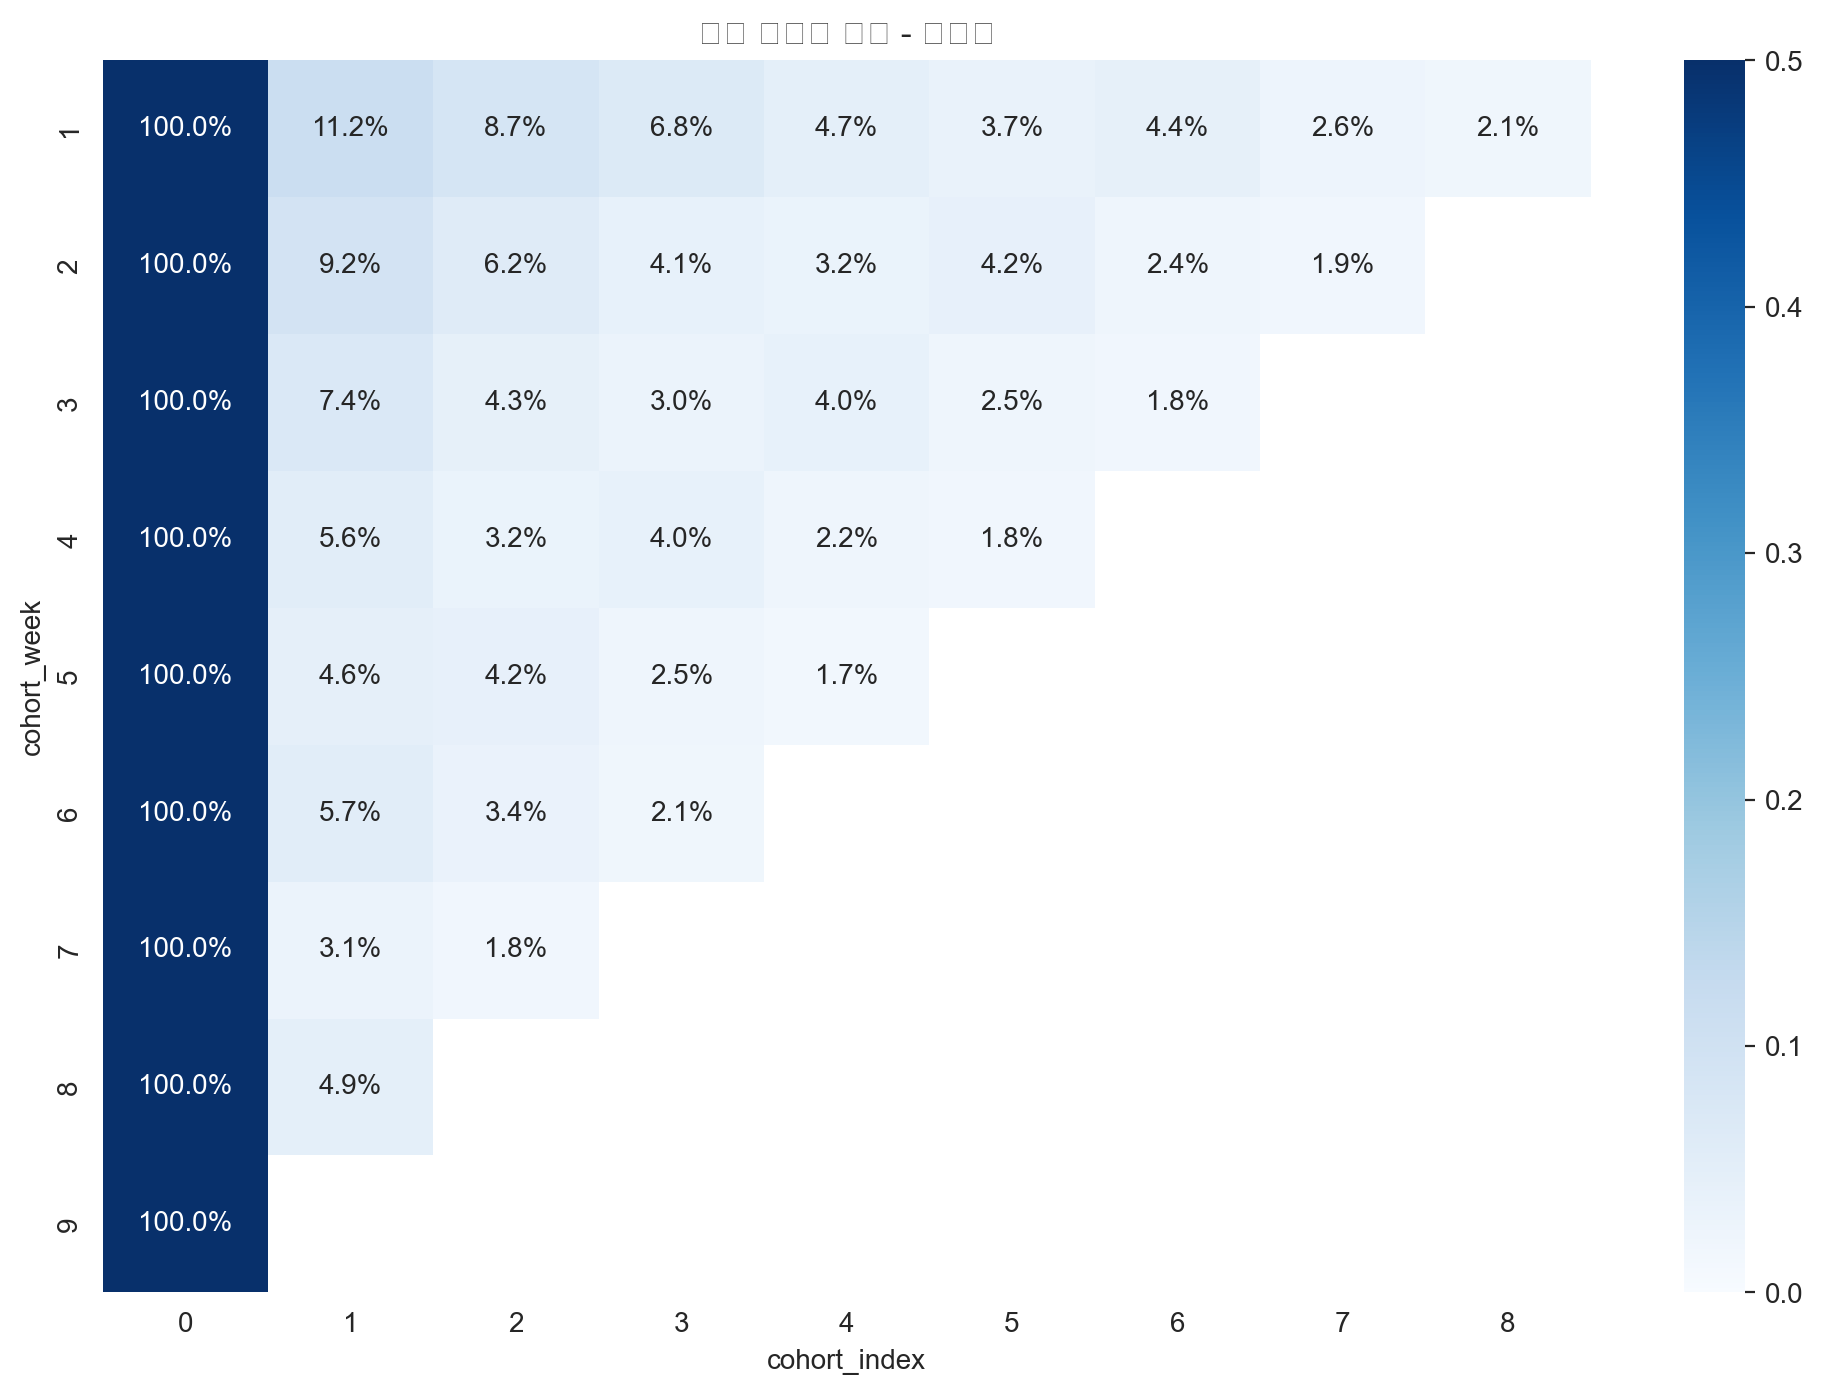

In [78]:
plt.figure(figsize=(12, 8))
plt.title('주간 코호트 분석 - 구매율')
sns.heatmap(data=retention_matrix,
            annot=True,
            fmt='.1%',
            vmin=0.0,
            vmax=0.5,
            cmap='Blues')
plt.show()

### 월별 코호트 빈도수

In [79]:
df_p_valid['YearDiff'] = df_p_valid['YMD'].dt.year - df_p_valid['YMDMin'].dt.year
df_p_valid['MonthDiff'] = df_p_valid['YMD'].dt.month - df_p_valid['YMDMin'].dt.month

In [80]:
df_p_valid["CohortIndex"] = (df_p_valid['YearDiff'] * 12) + df_p_valid['MonthDiff'] + 1

In [81]:
df_p_valid["CohortIndex"].value_counts()

1    287979
2     23109
Name: CohortIndex, dtype: int64

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

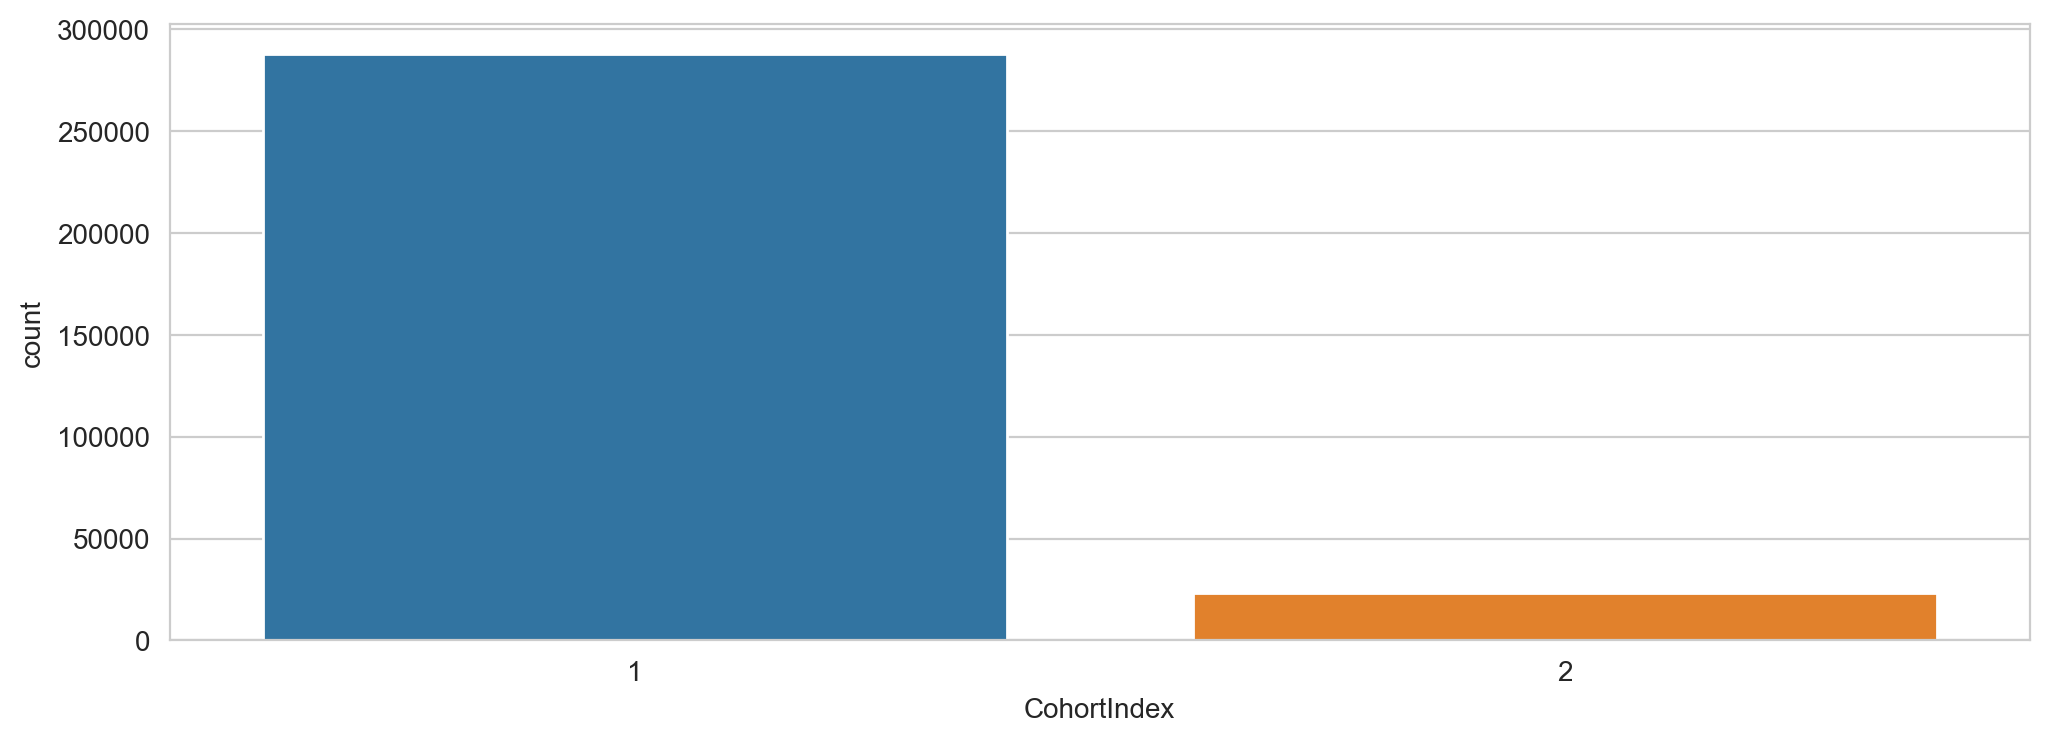

In [82]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_p_valid, x="CohortIndex")

### 코호트 일별 빈도수

In [83]:
cohort = df_p.groupby('user_id')['YMD'].min().reset_index()
cohort.columns = ['user_id', 'cohort_date']

In [84]:
df_p_day = pd.merge(df_p, cohort, on='user_id')
df_p_day['day_diff'] = (df_p_day['YMD'] - df_p_day['cohort_date']).dt.days

In [85]:
df_p_day['cohort_index'] = (df_p_day['day_diff'] + 1)

<AxesSubplot:xlabel='cohort_index', ylabel='count'>

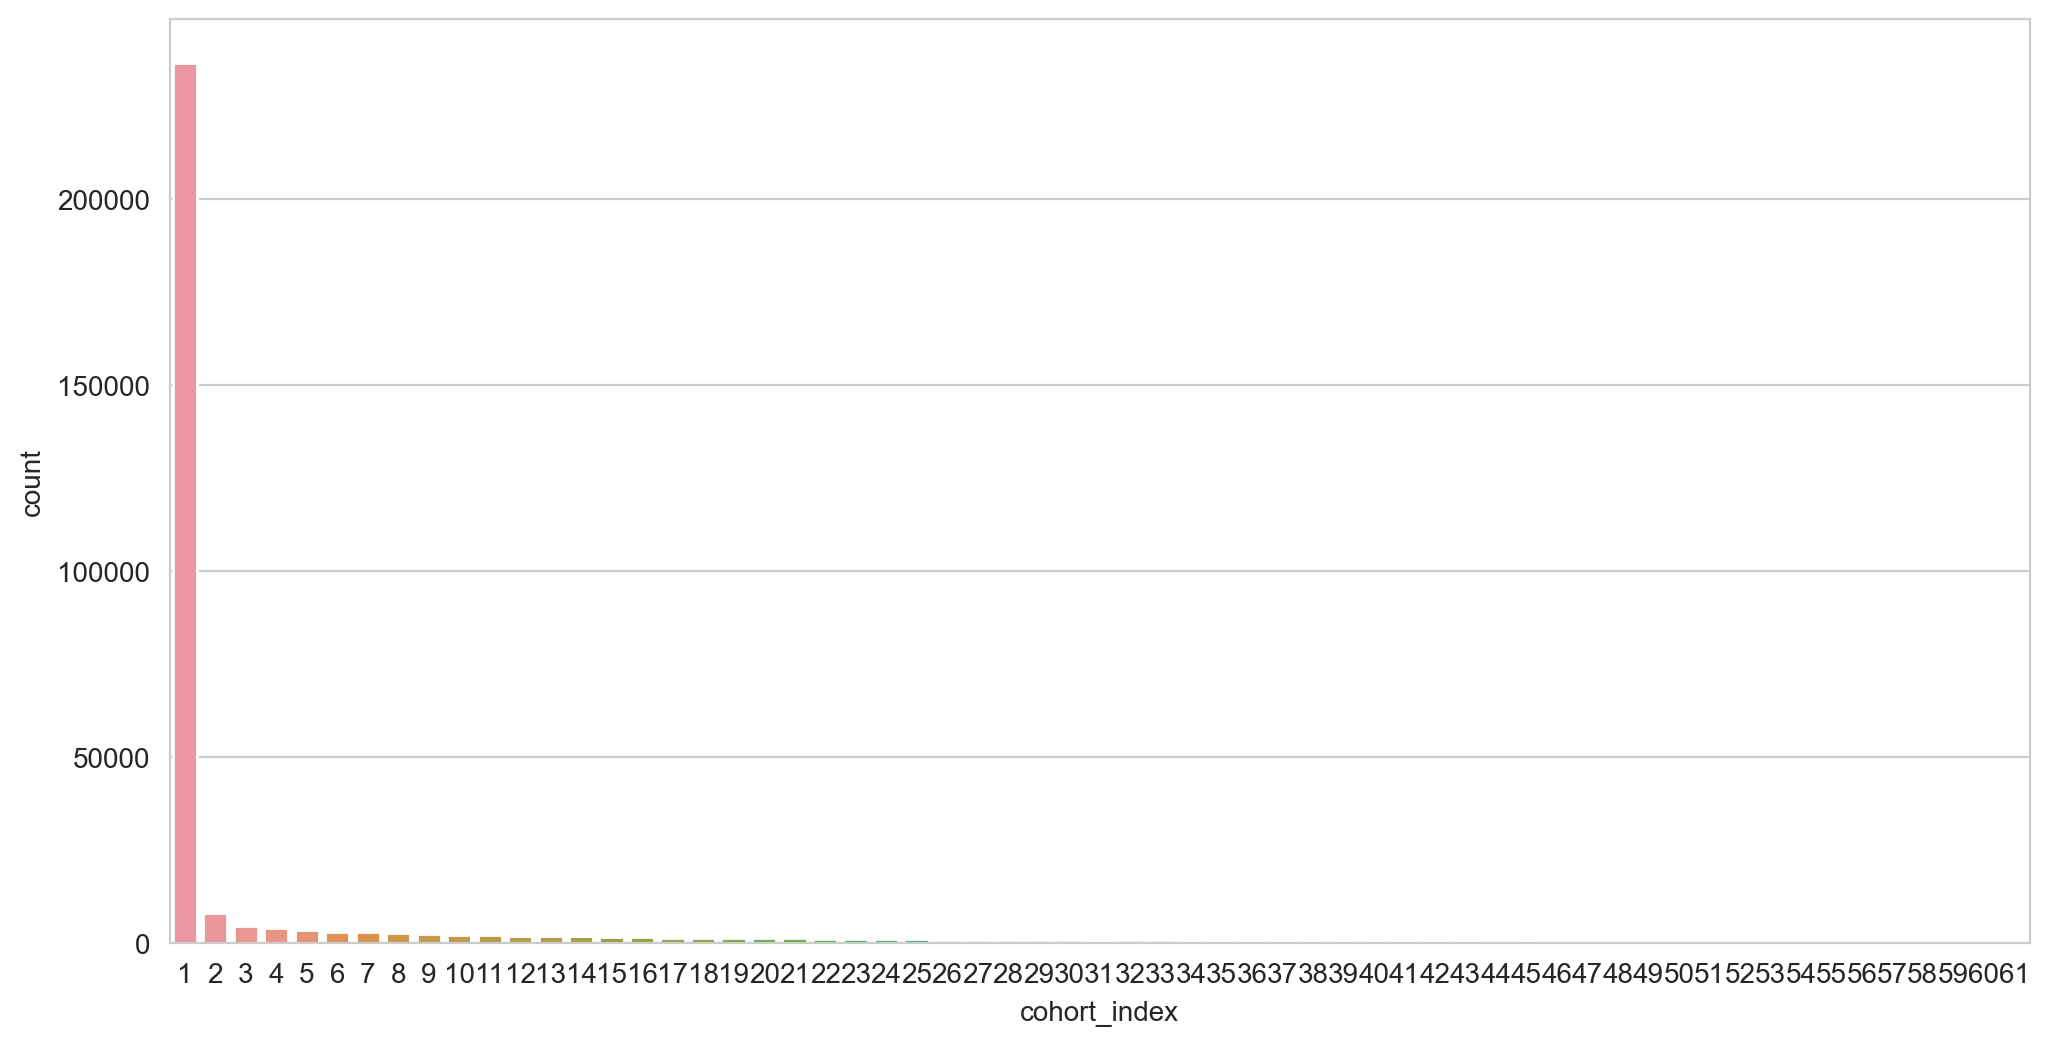

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_p_day, x='cohort_index')

In [87]:
df_p_2 = df_p[['YMD', 'cohort_index']]

In [88]:
cohort_counts = df_p_2.groupby(['YMD', 'cohort_index'])['cohort_index'].count().unstack()

In [89]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

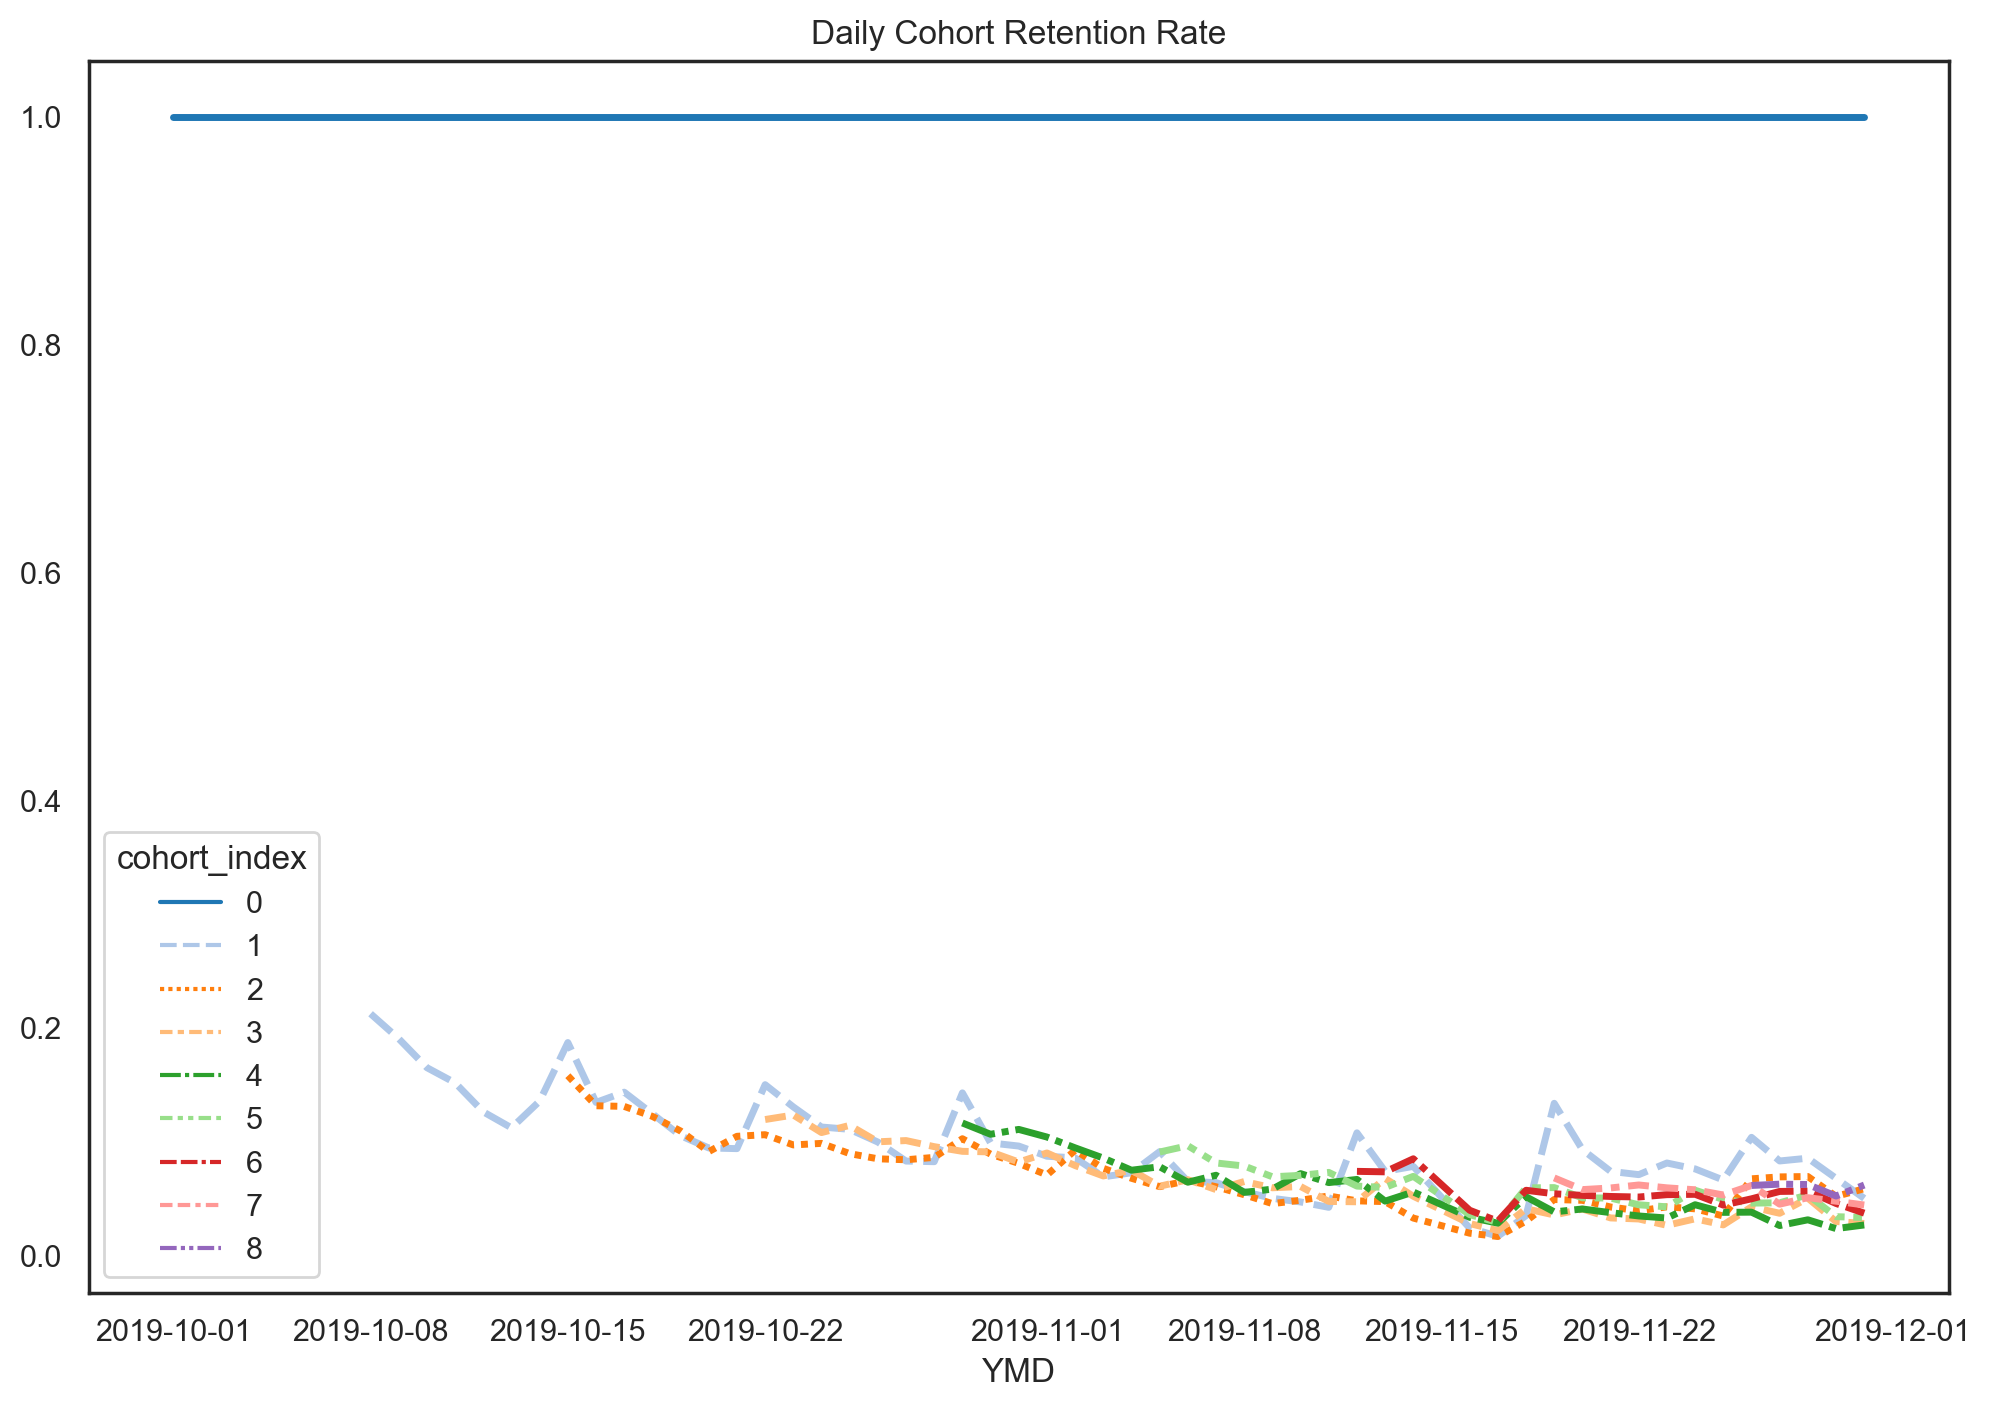

In [90]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Daily Cohort Retention Rate')
sns.lineplot(data=retention, palette='tab20', linewidth=2.5)
plt.show()

### 잔존 빈도 구하기
- 고객 유지 분석: 잔존빈도 데이터를 활용하여 고객의 재방문 빈도와 패턴을 파악할 수 있습니다. 이를 통해 고객이 얼마나 오래 이용하는지, 어떤 고객 그룹이 빠르게 탈퇴하는지, 어떤 고객 그룹이 장기간 이용하는지 등을 파악할 수 있습니다.

- 서비스 개선 분석: 잔존빈도 데이터는 서비스 개선 분석에도 활용될 수 있습니다. 고객이 재방문하는 이유를 파악하고, 이를 기반으로 서비스 개선이나 추가 기능 개발을 수행할 수 있습니다.

- 마케팅 분석: 잔존빈도 데이터는 마케팅 분석에도 활용될 수 있습니다. 특정 마케팅 캠페인에 대해 새로 유입된 고객을 기준으로, 그룹별로 몇 번 재방문하는지 측정하여 해당 캠페인의 효과를 분석할 수 있습니다.

- 수익성 분석: 잔존빈도 데이터는 수익성 분석에도 활용될 수 있습니다. 고객 그룹별로 재방문 빈도와 구매 금액을 파악하여, 해당 고객 그룹이 전체 매출에서 어느 정도의 비중을 차지하는지 파악할 수 있습니다. 이를 통해, 수익성이 높은 고객 그룹을 파악하고 해당 그룹에 집중적인 마케팅 또는 서비스 개발을 수행할 수 있습니다.

In [91]:
cohort_count = df_p.groupby(['cohort_week', 'cohort_index'])["user_id"].nunique().unstack()
cohort_count

cohort_index        0       1       2       3       4       5       6      7  \
cohort_week                                                                    
1             29031.0  3251.0  2519.0  1965.0  1375.0  1075.0  1289.0  767.0   
2             30502.0  2806.0  1896.0  1239.0   990.0  1277.0   718.0  572.0   
3             29907.0  2210.0  1296.0   912.0  1206.0   733.0   548.0    NaN   
4             25539.0  1427.0   827.0  1014.0   567.0   450.0     NaN    NaN   
5             18368.0   854.0   771.0   461.0   319.0     NaN     NaN    NaN   
6             17348.0   981.0   589.0   372.0     NaN     NaN     NaN    NaN   
7             37968.0  1181.0   698.0     NaN     NaN     NaN     NaN    NaN   
8             16411.0   796.0     NaN     NaN     NaN     NaN     NaN    NaN   
9             12563.0     NaN     NaN     NaN     NaN     NaN     NaN    NaN   

cohort_index      8  
cohort_week          
1             617.0  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN

In [92]:
cohort_count.index = cohort_count.index.astype(str).str[:7]

<AxesSubplot:xlabel='cohort_index', ylabel='cohort_week'>

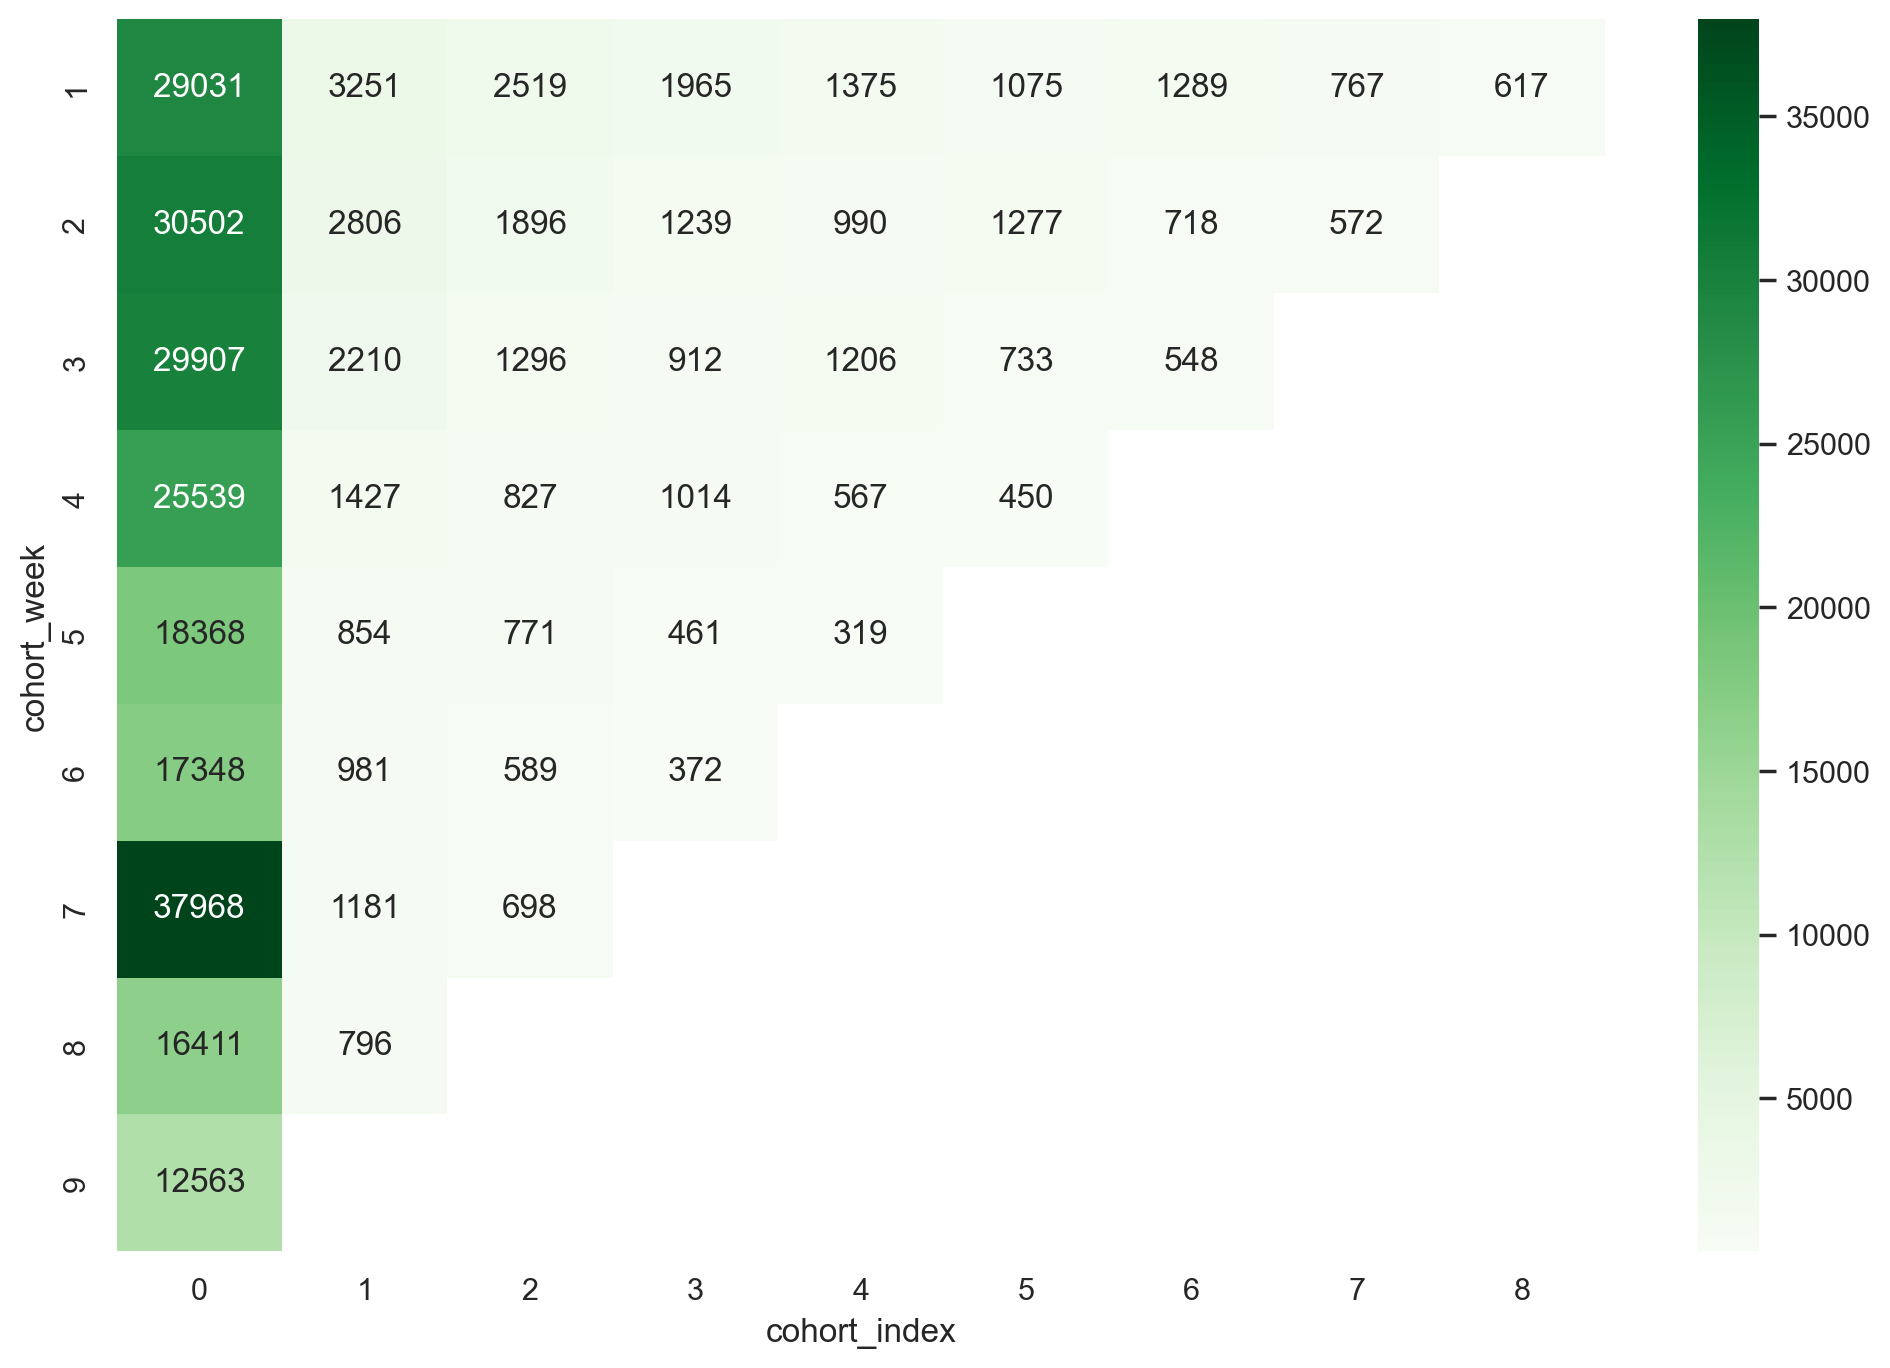

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, cmap="Greens", annot=True, fmt=".0f")

### 주별 신규 유입 고객 수

In [94]:
cohort_count[1]

cohort_week
1    3251.0
2    2806.0
3    2210.0
4    1427.0
5     854.0
6     981.0
7    1181.0
8     796.0
9       NaN
Name: 1, dtype: float64

<AxesSubplot:xlabel='cohort_week'>

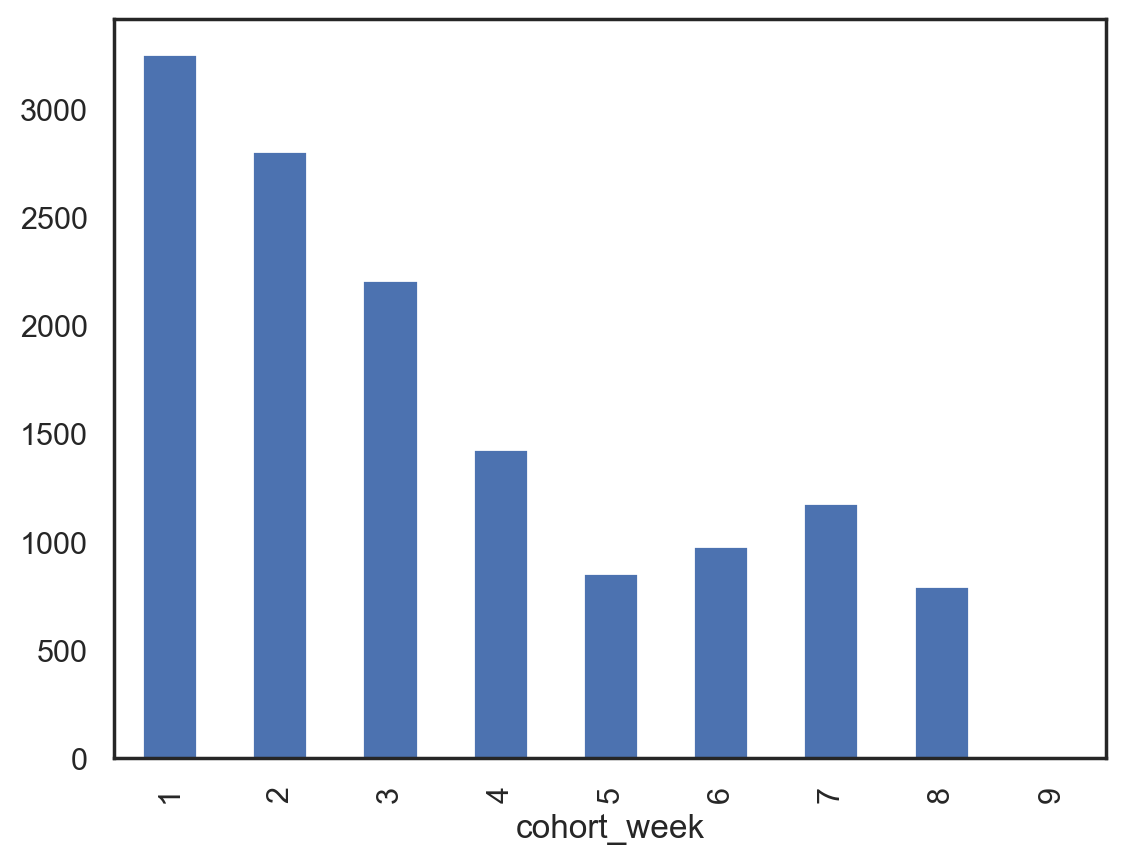

In [95]:
cohort_count[1].plot.bar()

### 잔존율 구하기

In [96]:
cohort_norm = cohort_count.div(cohort_count[1], axis=0).round(2)
cohort_norm

cohort_index      0    1     2     3     4     5     6     7     8
cohort_week                                                       
1              8.93  1.0  0.77  0.60  0.42  0.33  0.40  0.24  0.19
2             10.87  1.0  0.68  0.44  0.35  0.46  0.26  0.20   NaN
3             13.53  1.0  0.59  0.41  0.55  0.33  0.25   NaN   NaN
4             17.90  1.0  0.58  0.71  0.40  0.32   NaN   NaN   NaN
5             21.51  1.0  0.90  0.54  0.37   NaN   NaN   NaN   NaN
6             17.68  1.0  0.60  0.38   NaN   NaN   NaN   NaN   NaN
7             32.15  1.0  0.59   NaN   NaN   NaN   NaN   NaN   NaN
8             20.62  1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
9               NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

<AxesSubplot:xlabel='cohort_index', ylabel='cohort_week'>

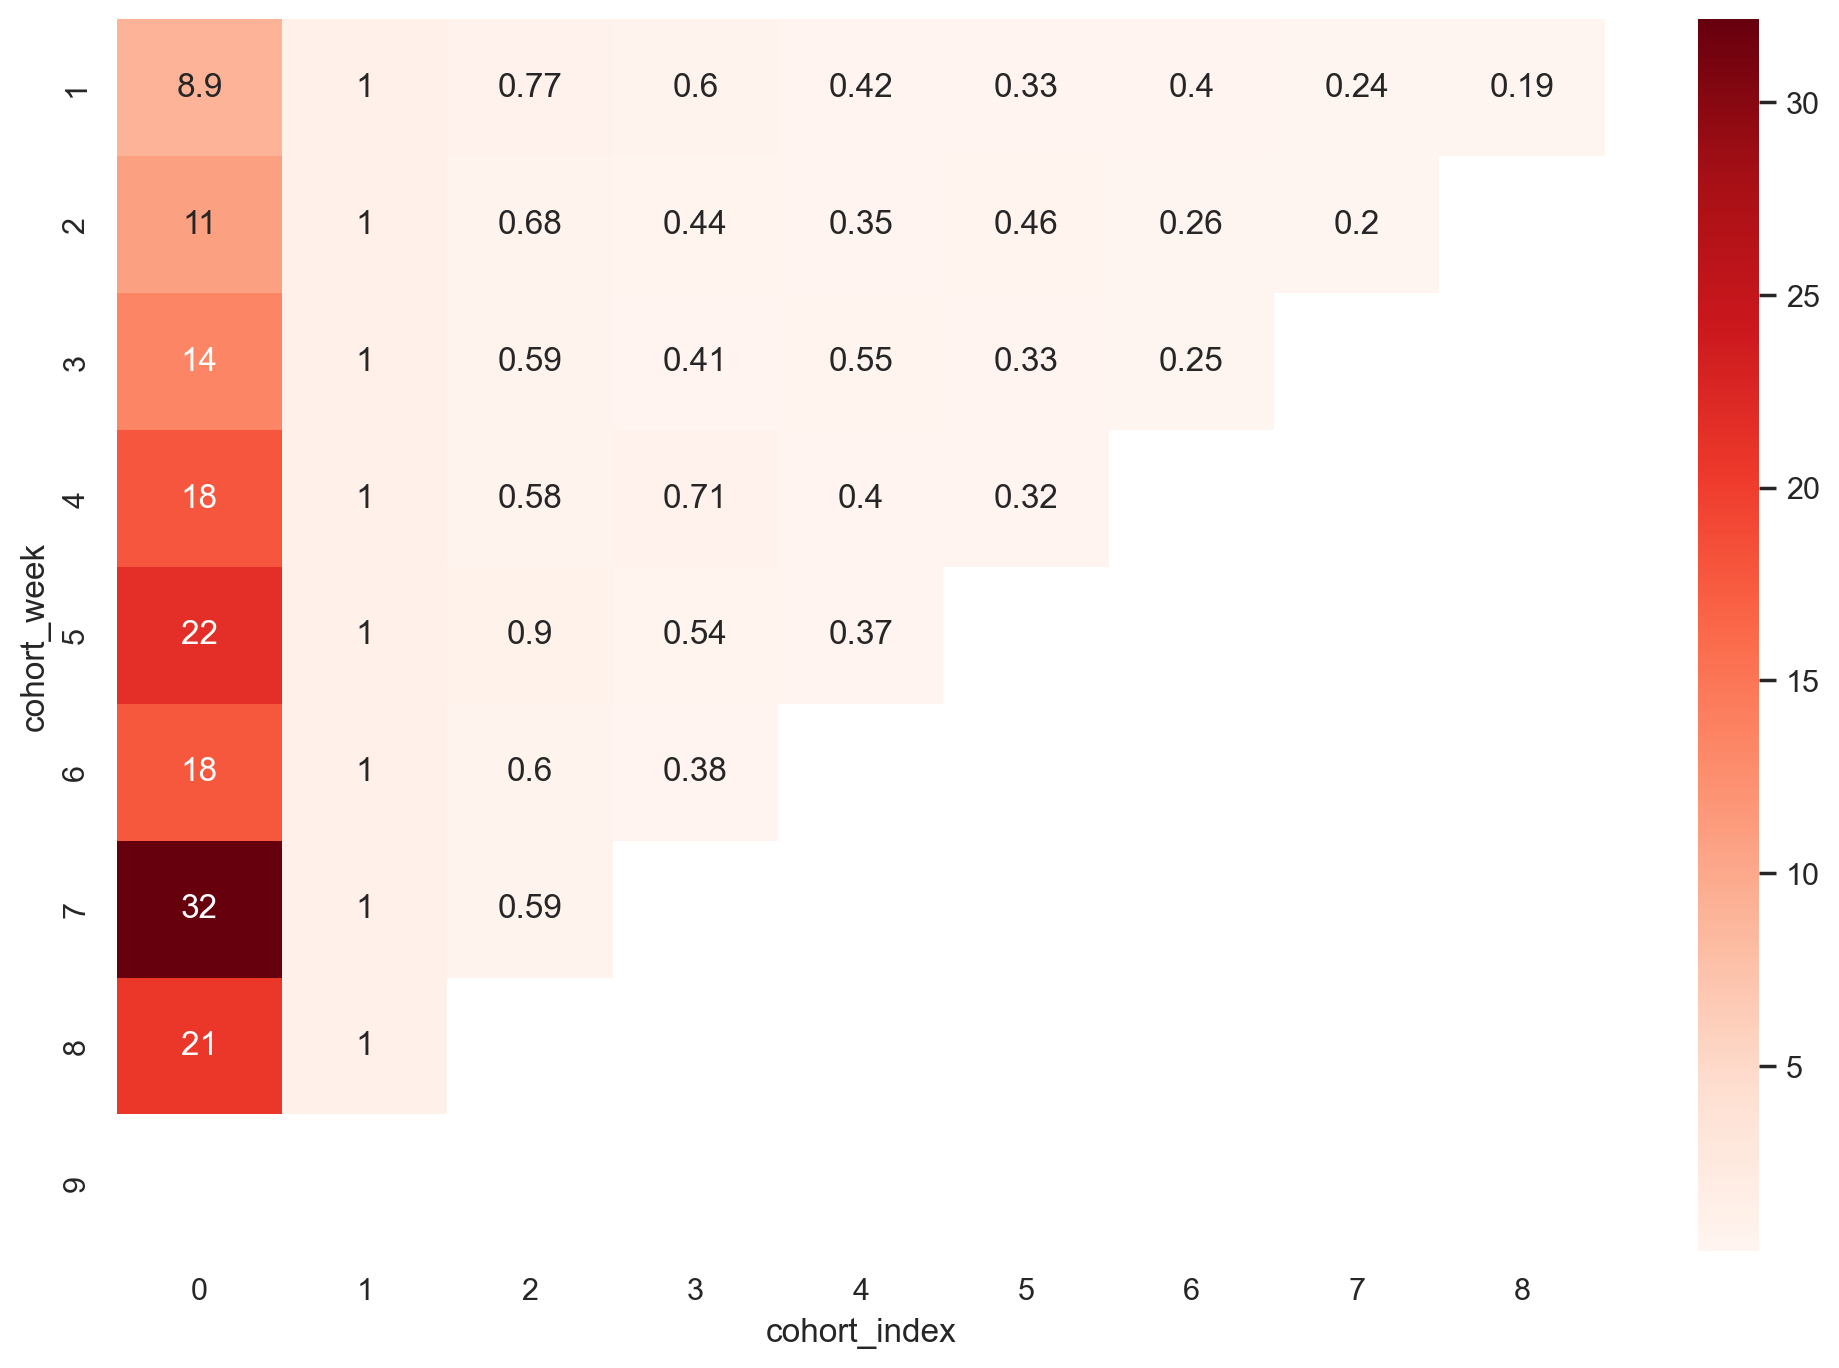

In [97]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_norm, cmap="Reds", annot=True)

### RFM 분석
Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?

Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?

Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?

In [98]:
df_p_valid = df_p_valid.drop_duplicates()
df_p_valid.shape

(311083, 19)

In [99]:
last_timestamp = df_p_valid["event_time"].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:52:27+0000', tz='UTC')

In [100]:
(last_timestamp - df_p_valid.iloc[0]["event_time"]).days

61

In [101]:
def find_recency(x):
    """최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구합니다."""
    return (last_timestamp - x.max()).days

find_recency(df_p_valid["event_time"][:1000])

30

In [187]:
rfm = df_p_valid.groupby("user_id").agg({"event_time" : lambda x : (last_timestamp - x.max()).days,
                                    "user_id" : "count", 
                                    "price": "sum"})
rfm.head(3)

event_time  user_id    price
user_id                                
138340325          20        1    93.50
264649825          56        2  1240.04
296197073           1        1    51.46

In [188]:
rfm.rename(columns={"event_time":"Recency"}, inplace=True)
rfm.rename(columns={"user_id":"Frequency"}, inplace=True)
rfm.rename(columns={"price":"MonetaryValue"}, inplace=True)

In [189]:
rfm

Recency  Frequency  MonetaryValue
user_id                                     
138340325       20          1          93.50
264649825       56          2        1240.04
296197073        1          1          51.46
304707635       18          1        2007.52
307138432       23          1         106.57
...            ...        ...            ...
579930533        1          1         227.64
579938391        1          1         181.21
579939979        1          1         321.73
579957748        1          1         163.39
579962208        1          1         437.31

[217637 rows x 3 columns]

In [194]:
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 3))
m_labels = list(range(1, 6))
cut_size = 5

In [195]:
r_cut = pd.qcut(rfm["Recency"], cut_size, labels=r_labels, duplicates='drop')
f_cut = pd.qcut(rfm["Frequency"], cut_size, labels=f_labels, duplicates='drop')
m_cut = pd.qcut(rfm["MonetaryValue"], cut_size, labels=m_labels, duplicates='drop')

In [196]:
rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

Recency  Frequency  MonetaryValue  R  F  M
user_id                                              
138340325       20          1          93.50  4  1  2
264649825       56          2        1240.04  1  1  5
296197073        1          1          51.46  5  1  1
304707635       18          1        2007.52  4  1  5
307138432       23          1         106.57  4  1  2
...            ...        ...            ... .. .. ..
579930533        1          1         227.64  5  1  3
579938391        1          1         181.21  5  1  3
579939979        1          1         321.73  5  1  4
579957748        1          1         163.39  5  1  3
579962208        1          1         437.31  5  1  4

[217637 rows x 6 columns]

- 타겟 마케팅: RFM 분석 결과를 바탕으로 고객 그룹을 나누고, 각 그룹에 맞는 마케팅 전략을 세울 수 있습니다. 예를 들어, 고객의 Recency와 Frequency 점수가 높지만 Monetary 점수가 낮은 그룹은 할인 이벤트나 쿠폰을 제공하여 재구매를 유도할 수 있습니다.

- 고객 이탈 예측: RFM 분석 결과를 바탕으로 최근 구매일자, 구매 빈도, 구매 금액 등을 고려하여 고객의 이탈 가능성을 예측할 수 있습니다. 이를 통해 이탈 가능성이 높은 고객에게 타겟 마케팅을 진행하여 이탈을 막을 수 있습니다.

- 상품 추천: 고객의 RFM Segment나 RFM Class에 따라 상품 추천을 제공할 수 있습니다. 예를 들어, Monetary 점수가 높은 고객에게는 고가 상품을 추천하거나, Frequency 점수가 높은 고객에게는 구매 빈도가 높은 제품을 추천할 수 있습니다.

- 수익 예측: 고객의 RFM Segment나 RFM Class를 분석하여 해당 그룹의 평균 구매 금액이나 구매 빈도 등을 파악하여 수익을 예측할 수 있습니다. 이를 통해 마케팅 예산을 효율적으로 분배하거나, 비즈니스 전략을 세울 수 있습니다.

### rfm segment
: RFM 요소를 기반으로 고객을 분류한 뒤, 각각의 조합에 해당하는 Segment를 만들어 분석하는 방법입니다

In [197]:
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

### rfm score
: RFM 요소들의 범위를 정하여 각각의 요소에 대한 값에 따라 숫자 혹은 알파벳 등의 Class로 분류하는 방법입니다.

In [198]:
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score
user_id                                                                     
138340325       20          1          93.50  4  1  2         412          7
264649825       56          2        1240.04  1  1  5         115          7

<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

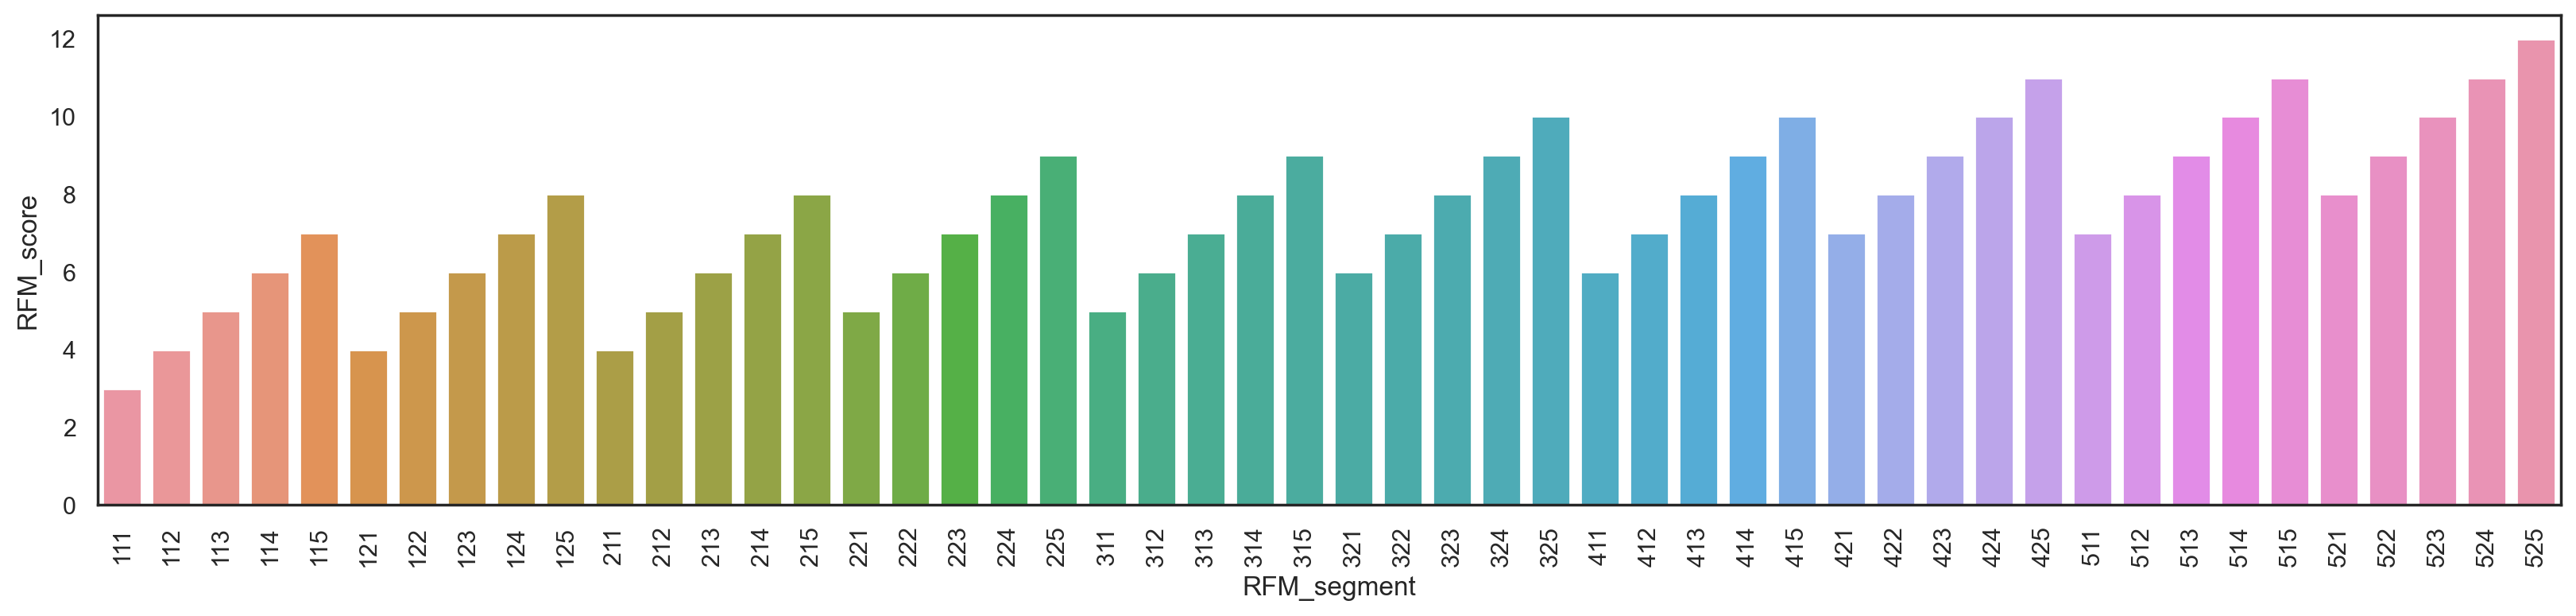

In [199]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

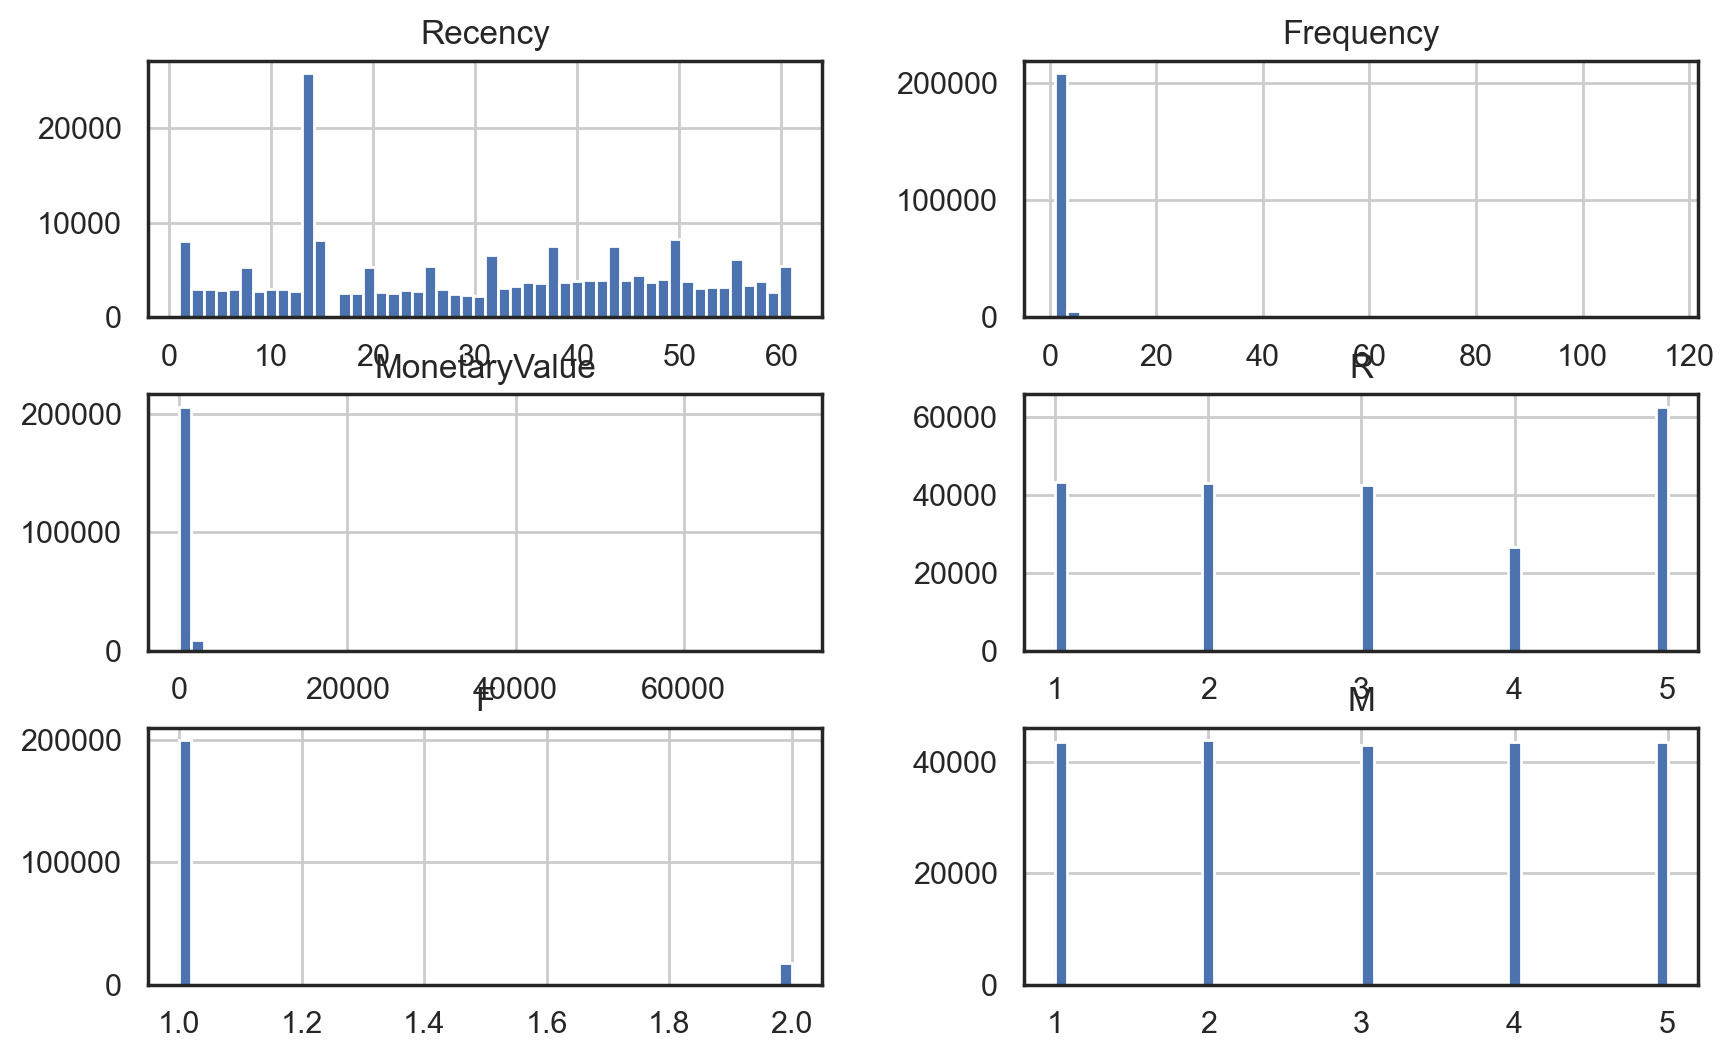

In [200]:
rfm.iloc[:, :-2].astype(float).hist(figsize=(10, 6), bins=50);

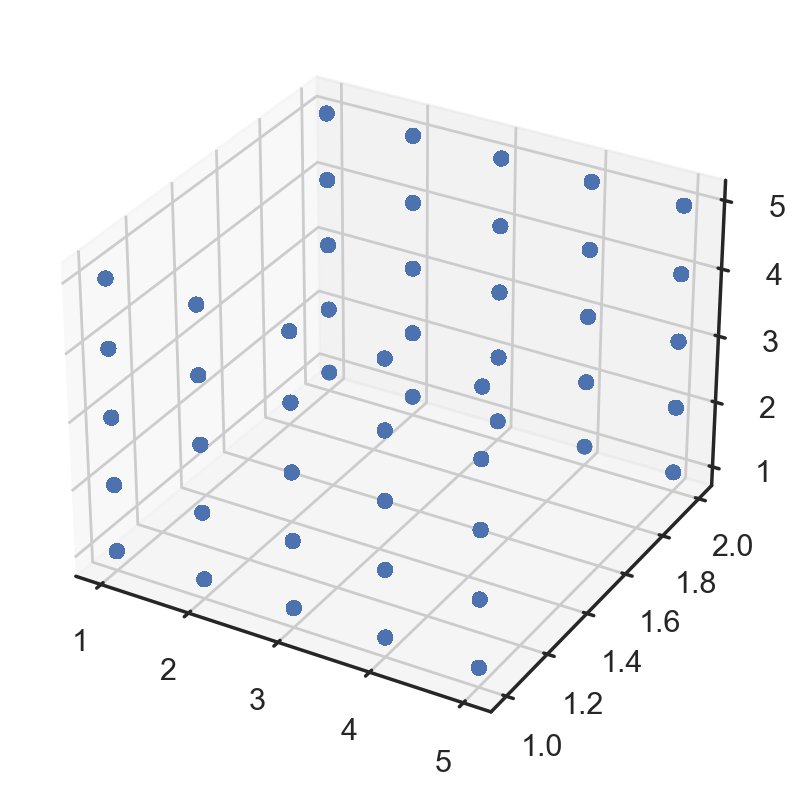

In [201]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

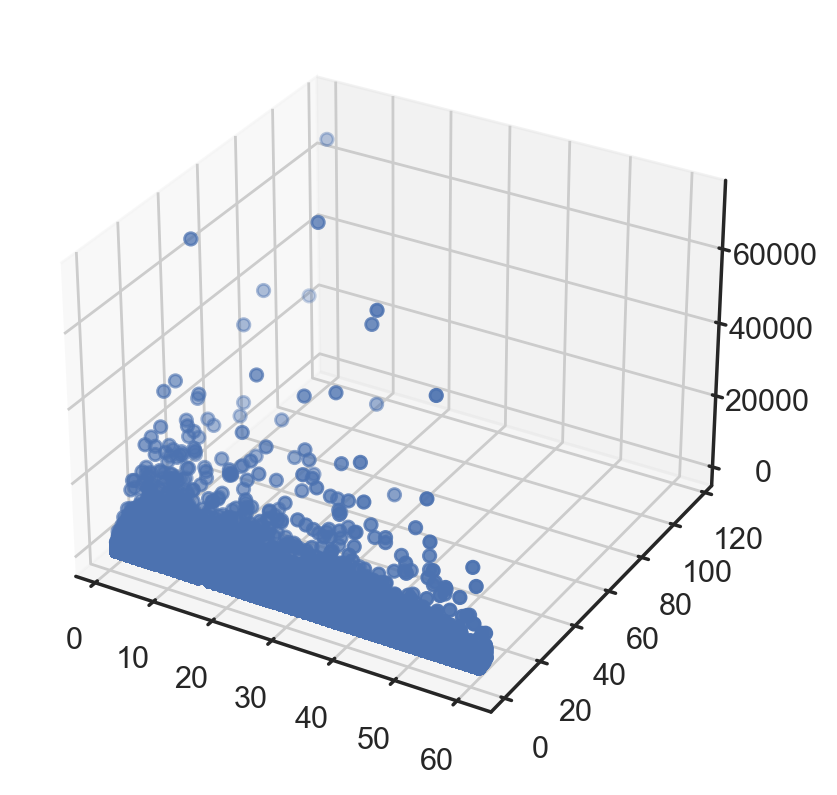

In [202]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [203]:
rfm.groupby("RFM_score").agg({"Recency": "mean", 
                              "Frequency" : "mean", 
                              "MonetaryValue" : ["mean", "sum"]
                             }).style.background_gradient().format("{:,.0f}")

In [204]:
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 
                           q=4, 
                           labels=["lv1", "lv2", "lv3","lv4"])

In [205]:
rfm.groupby("RFM_class")["RFM_score"].describe()

count       mean       std   min   25%   50%   75%   max
RFM_class                                                            
lv1        83568.0   4.908290  1.011636   3.0   4.0   5.0   6.0   6.0
lv2        39071.0   7.000000  0.000000   7.0   7.0   7.0   7.0   7.0
lv3        59244.0   8.439910  0.496380   8.0   8.0   8.0   9.0   9.0
lv4        35754.0  10.610617  0.715180  10.0  10.0  10.0  11.0  12.0

### rfm class별 rfm score

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

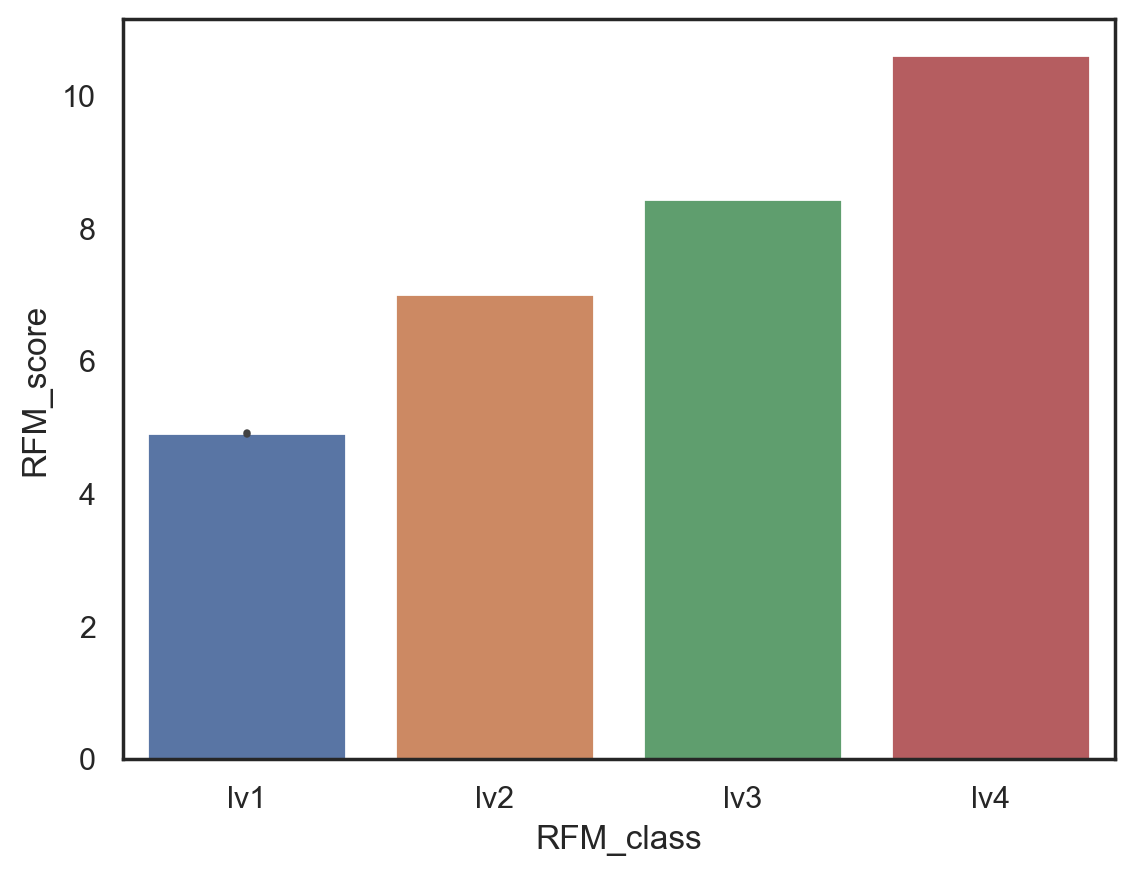

In [206]:
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

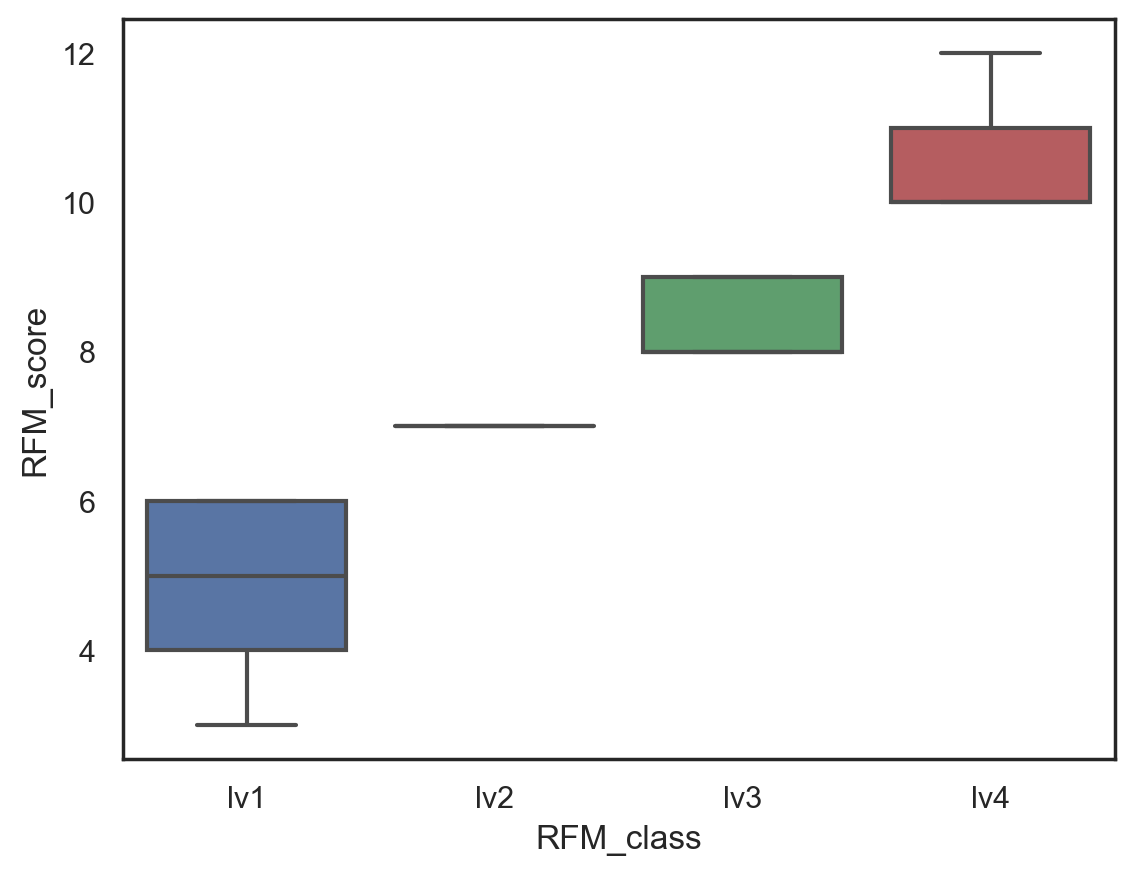

In [207]:
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

### 최근성

<AxesSubplot:xlabel='R', ylabel='RFM_score'>

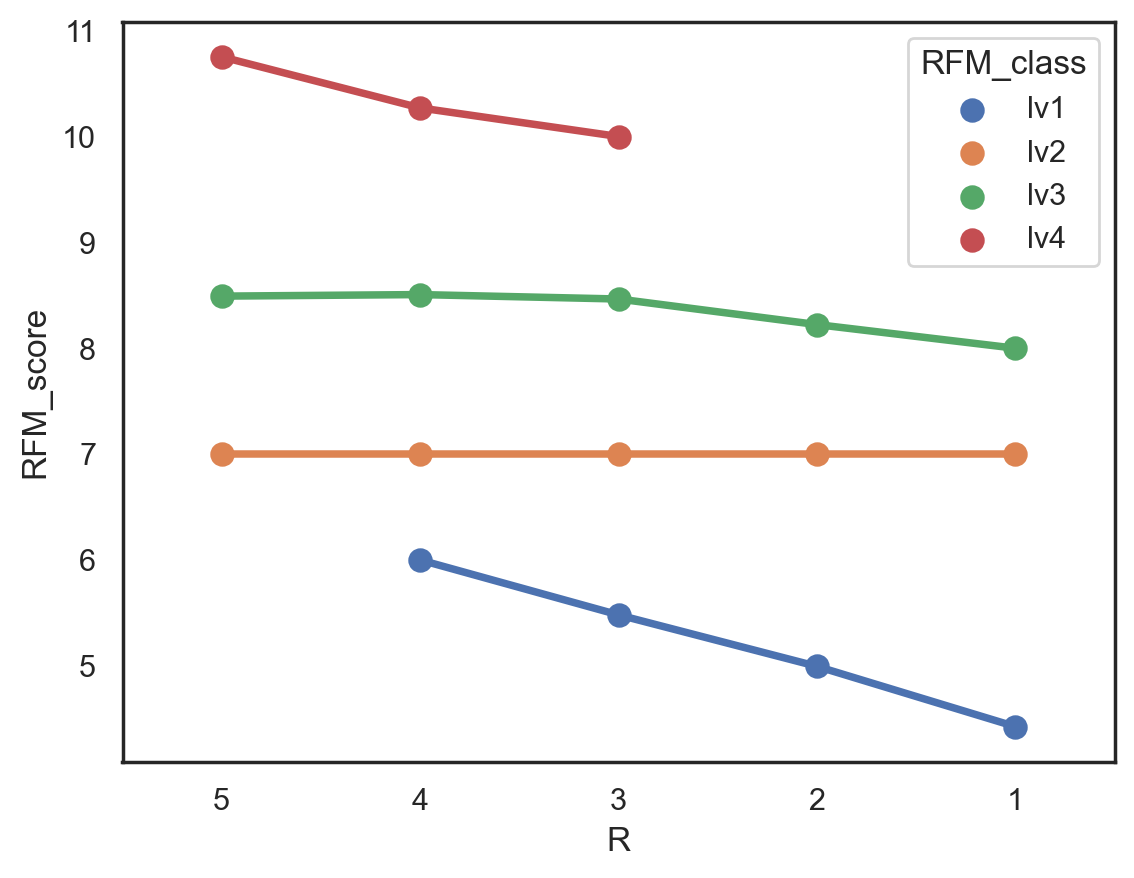

In [208]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

### 빈도

<AxesSubplot:xlabel='F', ylabel='RFM_score'>

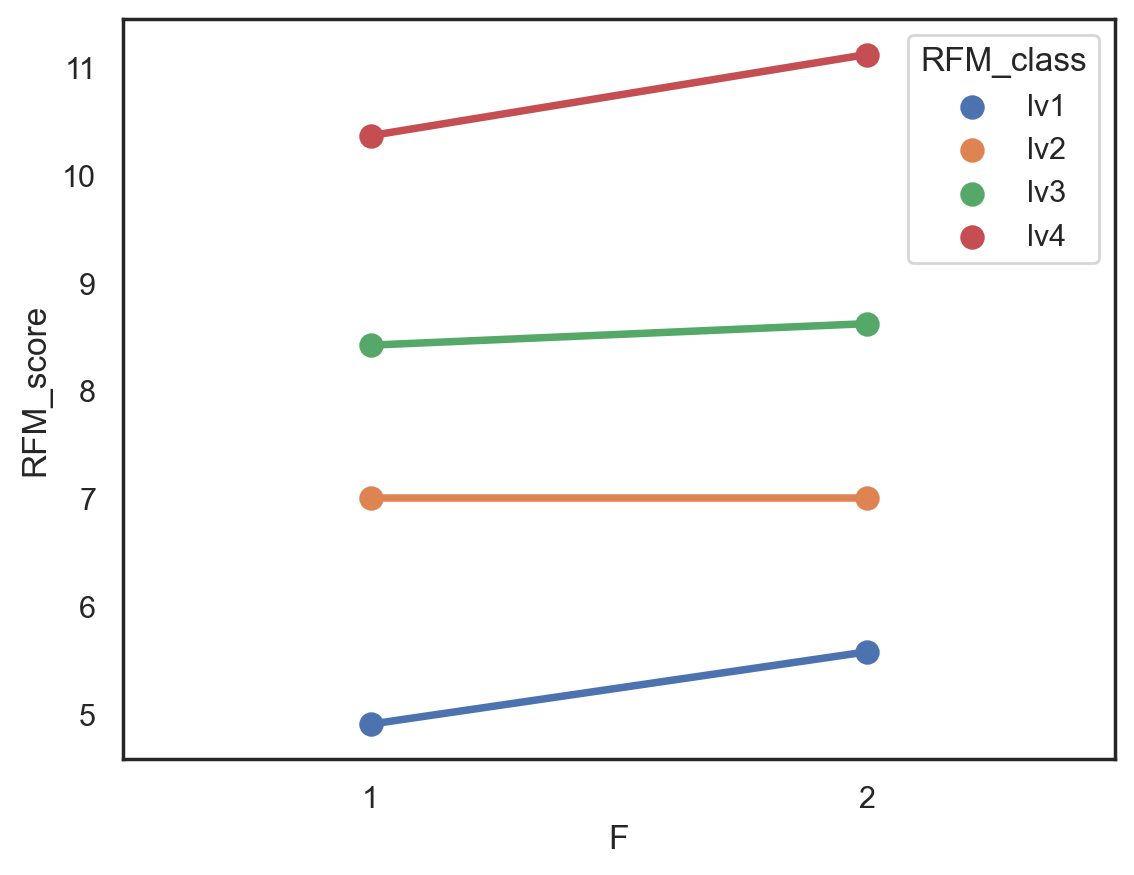

In [209]:
sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

### 거래규모

<AxesSubplot:xlabel='M', ylabel='RFM_score'>

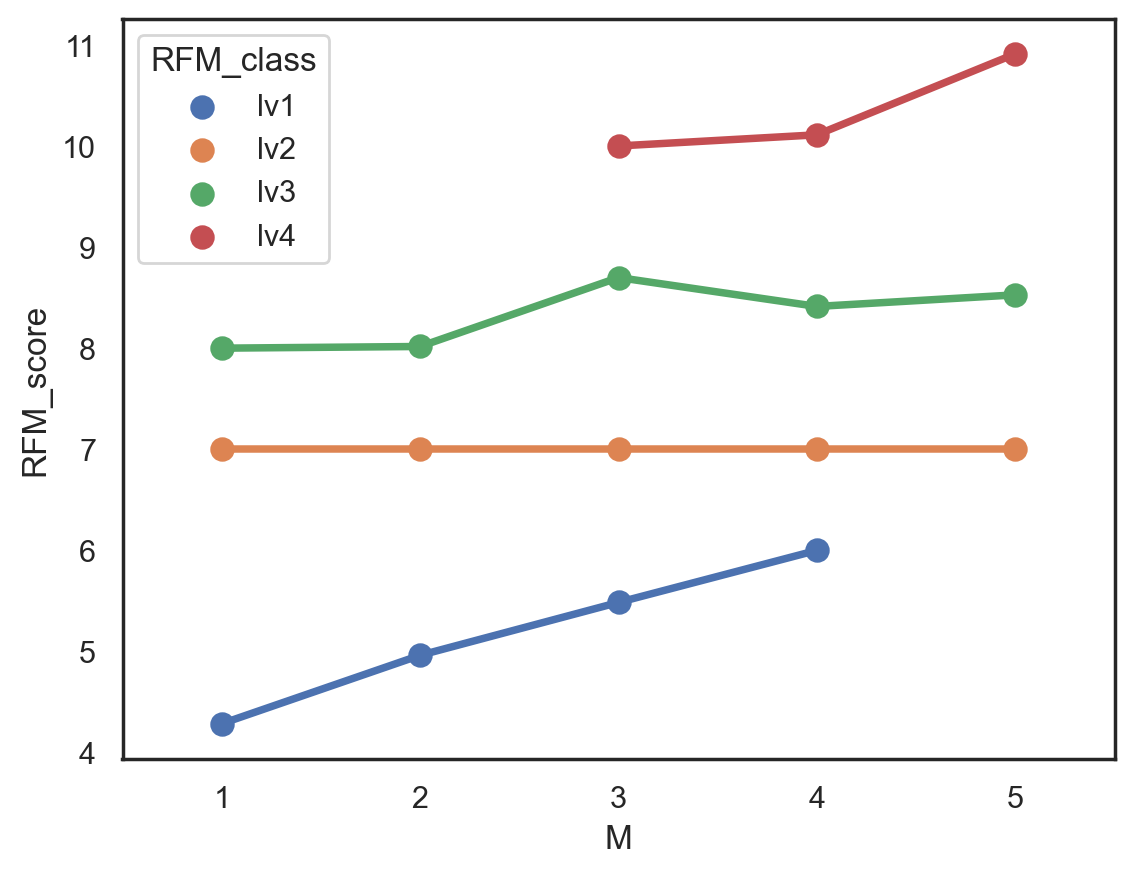

In [210]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [211]:
rfm_class_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count"]})

In [212]:
rfm_class_agg.style.background_gradient(cmap="Oranges").format("{:,.0f}")

### rfm class별 분포

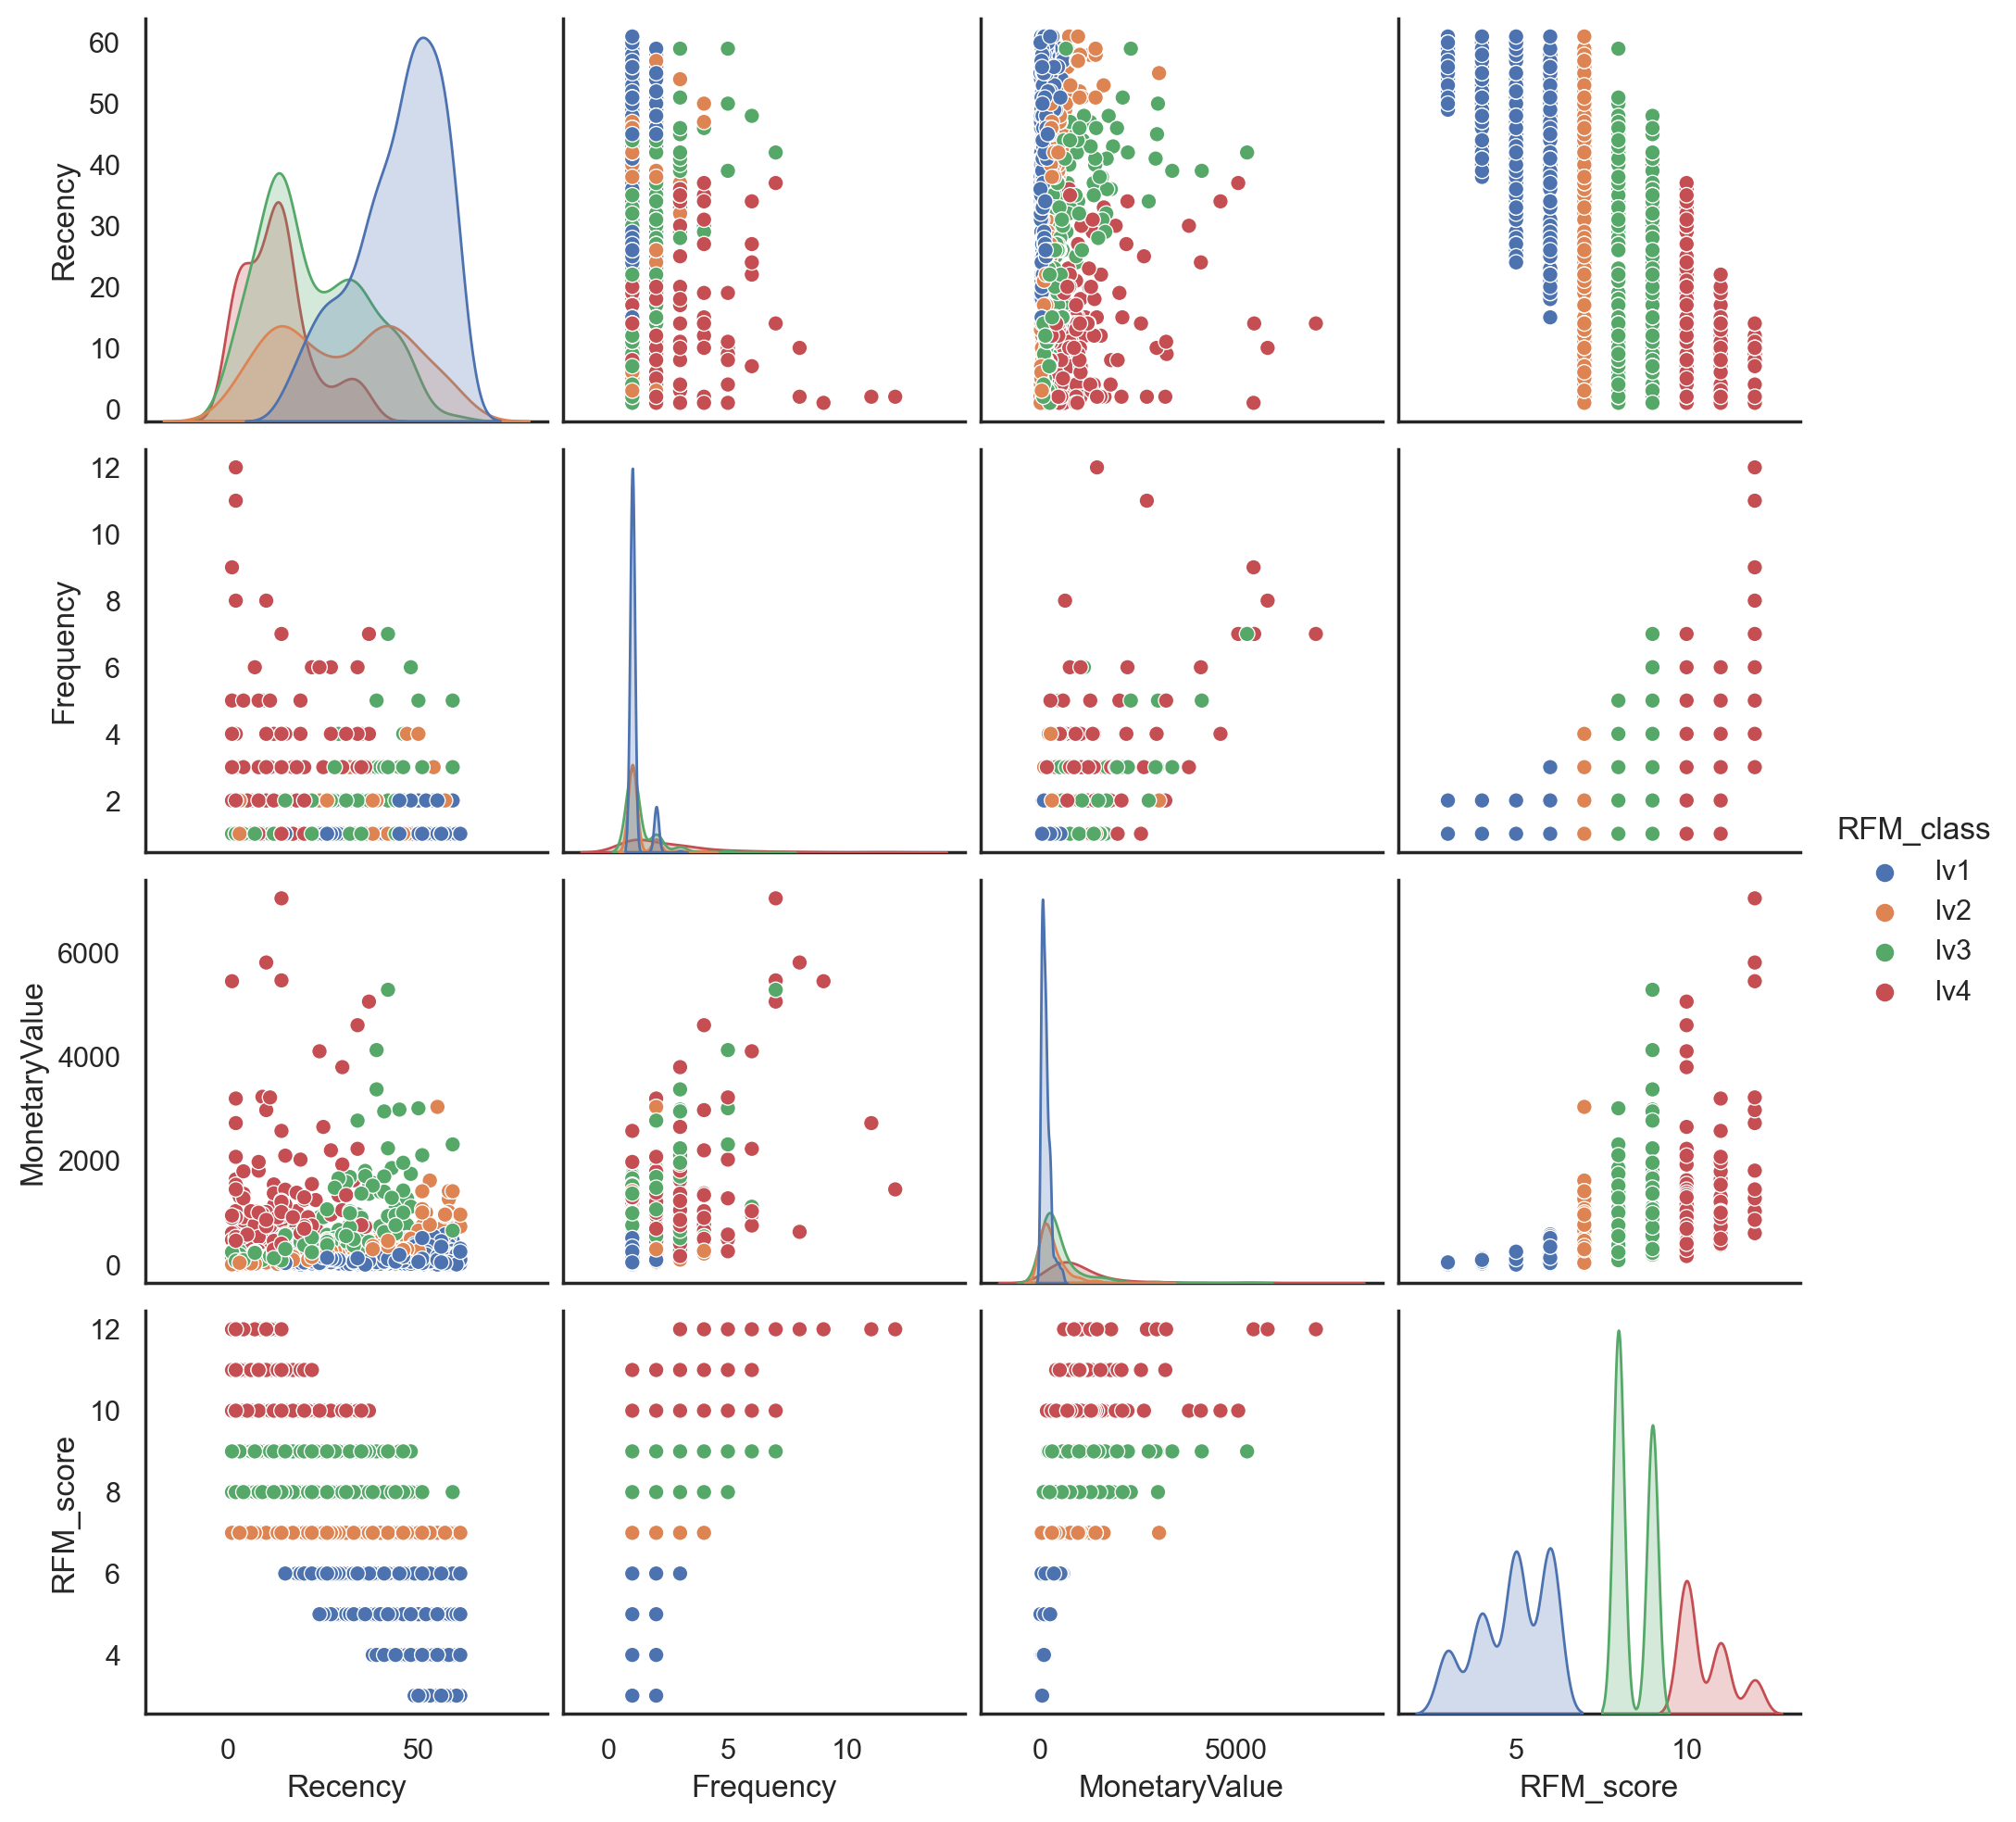

In [213]:
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")

In [214]:
corr = rfm.corr(numeric_only=True)
corr

Recency  Frequency  MonetaryValue  RFM_score
Recency        1.000000  -0.109352      -0.065253  -0.709033
Frequency     -0.109352   1.000000       0.678514   0.335314
MonetaryValue -0.065253   0.678514       1.000000   0.404609
RFM_score     -0.709033   0.335314       0.404609   1.000000

In [215]:
mask = np.triu(np.ones_like(corr))

### rfm의 상관계수

<AxesSubplot:>

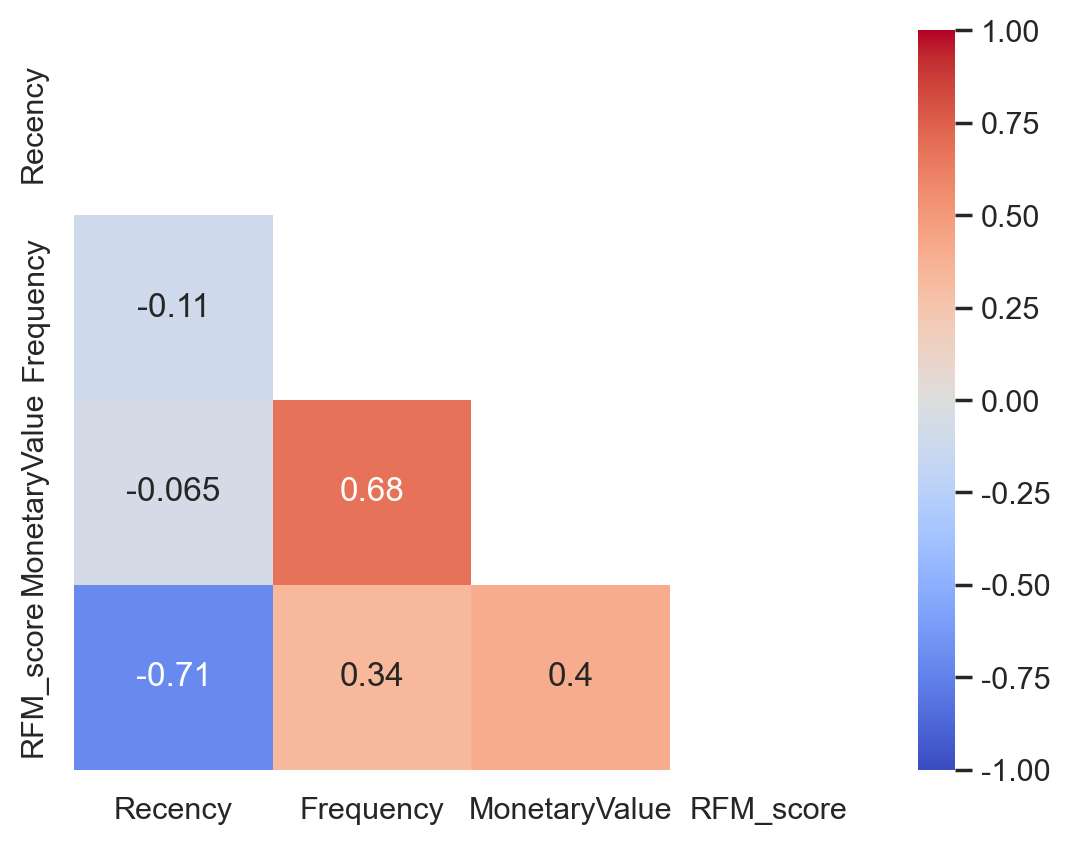

In [216]:
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=mask)

In [217]:
rfm_cluster = rfm.iloc[:, :3]
print(rfm_cluster.shape)
rfm_cluster.head(3)

(217637, 3)


Recency  Frequency  MonetaryValue
user_id                                     
138340325       20          1          93.50
264649825       56          2        1240.04
296197073        1          1          51.46

In [218]:
rfm_cluster.describe()

Recency      Frequency  MonetaryValue
count  217637.000000  217637.000000  217637.000000
mean       30.308054       1.429366     436.292236
std        17.545066       1.461633     884.253077
min         1.000000       1.000000       0.770000
25%        14.000000       1.000000      92.380000
50%        31.000000       1.000000     201.030000
75%        46.000000       1.000000     469.770000
max        61.000000     116.000000   72815.050000

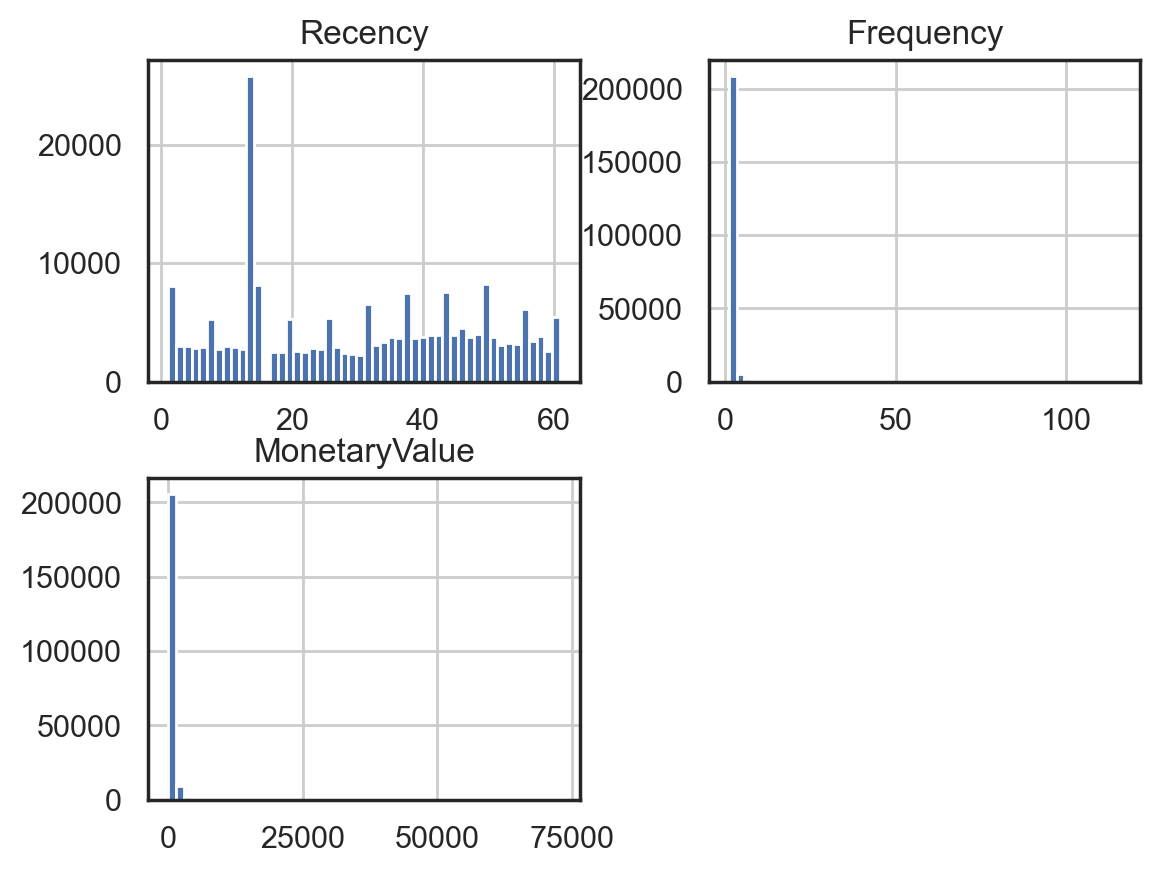

In [219]:
rfm_cluster.hist(bins=50);

In [220]:
rfm_cluster_log = np.log(rfm_cluster + 1)
rfm_cluster_log.head(2)

Recency  Frequency  MonetaryValue
user_id                                      
138340325  3.044522   0.693147       4.548600
264649825  4.043051   1.098612       7.123705

In [221]:
rfm_cluster_log.describe()

Recency      Frequency  MonetaryValue
count  217637.000000  217637.000000  217637.000000
mean        3.204258       0.823670       5.322865
std         0.800120       0.298288       1.242821
min         0.693147       0.693147       0.570980
25%         2.708050       0.693147       4.536677
50%         3.465736       0.693147       5.308416
75%         3.850148       0.693147       6.154370
max         4.127134       4.762174      11.195692

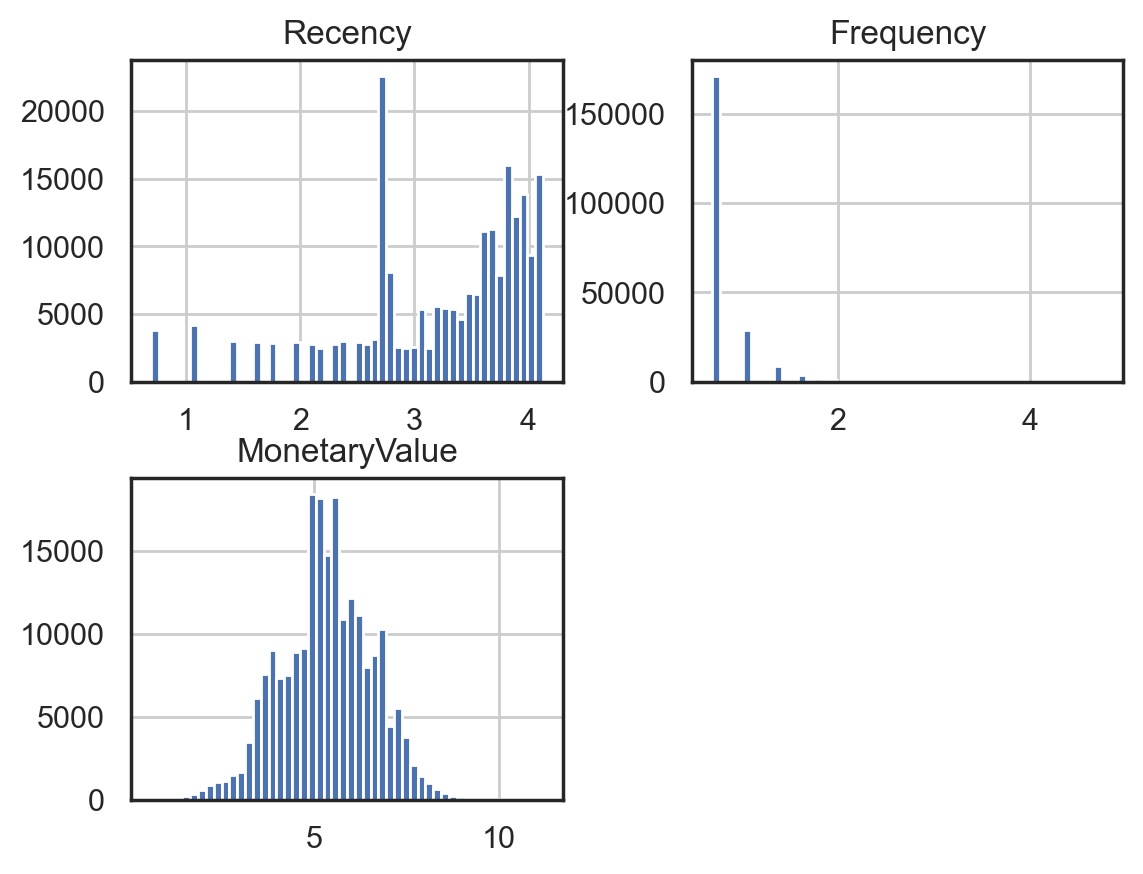

In [222]:
rfm_cluster_log.hist(bins=50);

In [223]:
import seaborn as sns

# RFM 분석 결과 계산
rfm_scores = rfm["RFM_segment"]

# 고객을 신규유입고객과 VIP고객으로 구분
new_customers = rfm_scores[rfm_scores["lv1"] == "111"]
vip_customers = rfm_scores[rfm_scores["lv4"] == "111"]

# RFM 점수 분포 시각화
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.histplot(new_customers["Recency"], kde=True, ax=ax[0][0])
sns.histplot(vip_customers["Recency"], kde=True, ax=ax[0][1])
sns.histplot(new_customers["Frequency"], kde=True, ax=ax[0][2])
sns.histplot(vip_customers["Frequency"], kde=True, ax=ax[1][0])
sns.histplot(new_customers["Monetary"], kde=True, ax=ax[1][1])
sns.histplot(vip_customers["Monetary"], kde=True, ax=ax[1][2])
ax[0][0].set_title("New Customers: Recency Distribution")
ax[0][1].set_title("VIP Customers: Recency Distribution")
ax[0][2].set_title("New Customers: Frequency Distribution")
ax[1][0].set_title("VIP Customers: Frequency Distribution")
ax[1][1].set_title("New Customers: Monetary Distribution")
ax[1][2].set_title("VIP Customers: Monetary Distribution")
plt.tight_layout()
plt.show()


KeyError: 'lv1'